### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [6]:
gov_arch_csv = '../data/v2/communities_data_prepped.csv'

In [7]:
gov_df = pd.read_csv(gov_arch_csv)

In [8]:
gov_df.head()

Name                                       Institutions  \
0  !Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   

                                           Mechanism  \
0  Leader (first among equals),Deliberation,Corpo...   
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Blood...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Consultation,Autocratic Leader/Chief...   

                                Culture/Values/Norms  \
0  Reciprocity,Cooperation,Egalitarianism,Generos...   
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                NaN   

                                               Notes  \
0  Hxaro - System of mutual reciprocity and socia...   
1  There are many Celtic oppida throughout northe...   
2                               see Institutions tab   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   

                                           Time span  Time span: Start  \
0      20th century - Present\n(dates are arbitrary)              1900   
1                                 2nd-1st century BC              -200   
2                             20th century - Present              1900   
3                                4th-12th century AD               300   
4  1st-7th century AD\n(start date is arbitrary, ...                 0   

   Time span: End        Geography                 Size  \
0            2023     Africa South       1,001 - 10,000   
1               0     Europe North  100,001 - 1,000,000   
2            2023  Asia Southeast      10,001 - 100,000   
3            1200      Europe West     10,001 - 100,000   
4             700      Middle East              Unknown   

                                              Source  \
0  Polly Wiessner (1982), Risk, reciprocity and s...   
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...   
3  Camera, M. Istoria della città e costiera di A...   
4  Stasavage, David (2020), The Decline and Rise ...   

                                           Metanotes  \
0  Standing in for small-scale egalitarian bands....   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Heterogeneity   \
0                                                NaN   
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   

                                         FC comments expert check  \
0                                    Edited April 23          NaN   
1                                    Edited March 23          NaN   
2                                      Edited May 23          NaN   
3      Edited March 23 (could use more info on CGIs)          NaN   
4  Edited Feb 23 (could use additional sources fo...          NaN   

   enforcement_mechanisms_include_seizing_of_property  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                      

# Courts Analysis 

In [9]:
col_list = list(gov_df.columns.values)
col_list

['Name',
 'Institutions',
 'Mechanism',
 'Culture/Values/Norms',
 'Notes',
 'Time span',
 'Time span: Start',
 'Time span: End',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'enforcement_mechanisms_include_seizing_of_property',
 'decision_making_mechanisms_include_public_meetings',
 'decision_making_mechanisms_include_power_fluidity',
 'decision_making_mechanisms_include_petition',
 'decision_making_mechanisms_include_veto',
 'decision_making_mechanisms_include_representation',
 'decision_making_mechanisms_include_rule_of_law',
 'enforcement_mechanisms_include_appeal',
 'enforcement_mechanisms_include_tribunal_court_',
 'decision_making_mechanisms_include_kingchief-as-figurehead',
 'enforcement_mechanisms_include_destruction_of_property',
 'decision_making_mechanisms_include_remunerated_position',
 'decision_making_mechanisms_include_voting',
 'enforcement_mechanisms_include_mediation',
 'access_mechanisms_include_matrilineality',

In [10]:
court_col = ['enforcement_mechanisms_include_tribunal_court_']

In [11]:
courts = 'enforcement_mechanisms_include_tribunal_court_'

In [12]:
courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 1)]

In [13]:
no_courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 0)]

In [14]:
courts_df.head()

Name  \
0        !Kung San (Ju/hoansi)   
5                        Assur   
6    Athens (Classical Period)   
9                     Carthage   
14  Communes (Medieval Europe)   

                                         Institutions  \
0                          Hxaro,Headman,Group,Kgotla   
5                   King,Alum,Limmum,Scribe,City hall   
6   Council of Five Hundred (Boule),Areopagus,Ekkl...   
9   Rab kohanim,Council of Elders,Tribunal of 104,...   
14                                      King,Assembly   

                                            Mechanism  \
0   Leader (first among equals),Deliberation,Corpo...   
5   President/Consul/Chief Executive,Assembly (cen...   
6   Election,Plurality voting,Temporary position o...   
9   Blood relations,Tribunal/Court ,Suspension/Exp...   
14  Autocratic Leader/Chief (bound),Consultation,A...   

                                 Culture/Values/Norms  \
0   Reciprocity,Cooperation,Egalitarianism,Generos...   
5               Shared identity/Kinship,Written rules   
6   Discrimination,Egalitarianism,Shared identity/...   
9                                                 NaN   
14                                                NaN   

                                                Notes  \
0   Hxaro - System of mutual reciprocity and socia...   
5   Independent city-state. Constitutional monarch...   
6   'Cleisthenes reorganized Athens into 139 demes...   
9   'While it is true that Carthage had a range of...   
14  Municipal self-governance under a monarch resp...   

                                        Time span  Time span: Start  \
0   20th century - Present\n(dates are arbitrary)              1900   
5                 19th century BC\n(1920-1800 BC)             -1920   
6                 5th-4th century BC (508-322 BC)              -508   
9                              4th-2nd century BC              -400   
14                           10th-13th century AD               900   

    Time span: End                   Geography                 Size  \
0             2023                Africa South       1,001 - 10,000   
5            -1800  Europe Southeast, Anatolia       1,001 - 10,000   
6             -322                Europe South  100,001 - 1,000,000   
9             -100               Africa North   100,001 - 1,000,000   
14            1200                 Europe West     10,001 - 100,000   

                                               Source  \
0   Polly Wiessner (1982), Risk, reciprocity and s...   
5   Larsen, M. T. The Old Assyrian City-State in H...   
6   Stasavage, David (2020), The Decline and Rise ...   
9   Docter, Roald (2015), Punic Carthage, in Carth...   
14  Reynolds, Kingdoms and communities in Western ...   

                                            Metanotes Heterogeneity   \
0   Standing in for small-scale egalitarian bands....            NaN   
5                                                 NaN            NaN   
6                                                 NaN            NaN   
9                                                 NaN            NaN   
14                                                NaN            NaN   

                                          FC comments     expert check  \
0                                     Edited April 23              NaN   
5                                       Edited Mar 23  Giacomo CHECKED   
6                                       Edited Mar 23              NaN   
9   Edited Feb 23 (Additional sources can be used ...              NaN   
14    Edited Jun 23 (Could use more specific sources)              NaN   

    enforcement_mechanisms_include_seizing_of_property  \
0                                                   0    
5                                                   0    
6                                                   1    
9                                                   0    
14                                                  0    

    decision_making_mecha

In [15]:
no_courts_df.head()

Name                                       Institutions  \
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   
7      Aztec City-States                    Tlatoani,Council of high nobles   

                                           Mechanism  \
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Blood...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Consultation,Autocratic Leader/Chief...   
7  Autocratic Leader/Chief (bound),Heredity,Merit...   

                                Culture/Values/Norms  \
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                NaN   
7  Strict hierarchy/caste system,Obedience to aut...   

                                               Notes  \
1  There are many Celtic oppida throughout northe...   
2                               see Institutions tab   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   
7  BOUNDARY CASE: there is a council but degree  ...   

                                           Time span  Time span: Start  \
1                                 2nd-1st century BC              -200   
2                             20th century - Present              1900   
3                                4th-12th century AD               300   
4  1st-7th century AD\n(start date is arbitrary, ...                 0   
7                             12th - 16th century AD              1100   

   Time span: End                Geography                 Size  \
1               0             Europe North  100,001 - 1,000,000   
2            2023          Asia Southeast      10,001 - 100,000   
3            1200              Europe West     10,001 - 100,000   
4             700              Middle East              Unknown   
7            1600  Central America, Mexico  100,001 - 1,000,000   

                                              Source Metanotes  \
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...       NaN   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...       NaN   
3  Camera, M. Istoria della città e costiera di A...       NaN   
4  Stasavage, David (2020), The Decline and Rise ...       NaN   
7  Michael E. Smith, Aztec City-States, in Hansen...       NaN   

                                      Heterogeneity   \
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   
7                                                NaN   

                                         FC comments expert check  \
1                                    Edited March 23          NaN   
2                                      Edited May 23          NaN   
3      Edited March 23 (could use more info on CGIs)          NaN   
4  Edited Feb 23 (could use additional sources fo...          NaN   
7                                      Edited May 23          NaN   

   enforcement_mechanisms_include_seizing_of_property  \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    
7                                                  0    

   decision_making_mechanisms_include_public_meetings  \
1                                                  0    
2                                                  0    
3                      

In [16]:
courts_df.describe()

Time span: Start  Time span: End  \
count          16.00000       16.000000   
mean          308.00000      712.562500   
std          1473.52584     1320.941229   
min         -2700.00000    -1800.000000   
25%          -487.00000     -155.500000   
50%           900.00000     1231.000000   
75%          1425.00000     1825.000000   
max          1900.00000     2023.000000   

       enforcement_mechanisms_include_seizing_of_property  \
count                                            16.0000    
mean                                              0.0625    
std                                               0.2500    
min                                               0.0000    
25%                                               0.0000    
50%                                               0.0000    
75%                                               0.0000    
max                                               1.0000    

       decision_making_mechanisms_include_public_meetings  \
count                                            16.0000    
mean                                              0.0625    
std                                               0.2500    
min                                               0.0000    
25%                                               0.0000    
50%                                               0.0000    
75%                                               0.0000    
max                                               1.0000    

       decision_making_mechanisms_include_power_fluidity  \
count                                               16.0   
mean                                                 0.0   
std                                                  0.0   
min                                                  0.0   
25%                                                  0.0   
50%                                                  0.0   
75%                                                  0.0   
max                                                  0.0   

       decision_making_mechanisms_include_petition  \
count                                      16.0000   
mean                                        0.0625   
std                                         0.2500   
min                                         0.0000   
25%                                         0.0000   
50%                                         0.0000   
75%                                         0.0000   
max                                         1.0000   

       decision_making_mechanisms_include_veto  \
count                                  16.0000   
mean                                    0.0625   
std                                     0.2500   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0000   
max                                     1.0000   

       decision_making_mechanisms_include_representation  \
count                                          16.000000   
mean                                            0.250000   
std                                             0.447214   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.250000   
max                                             1.000000   

       decision_making_mechanisms_include_rule_of_law  \
count                                         16.0000   
mean                                           0.0625   
std                                            0.2500   
min                                            0.0000   
25%                                            0.0000   
50%                                            0.0000   
75%                                            0.0000   
max                                        

In [17]:
no_courts_df.describe()

Time span: Start  Time span: End  \
count         51.000000       51.000000   
mean         635.686275     1023.294118   
std         1393.050990     1256.017791   
min        -4100.000000    -3300.000000   
25%         -340.000000      -13.500000   
50%         1200.000000     1600.000000   
75%         1700.000000     1900.000000   
max         1900.000000     2023.000000   

       enforcement_mechanisms_include_seizing_of_property  \
count                                          51.000000    
mean                                            0.019608    
std                                             0.140028    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       decision_making_mechanisms_include_public_meetings  \
count                                          51.000000    
mean                                            0.196078    
std                                             0.400979    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       decision_making_mechanisms_include_power_fluidity  \
count                                          51.000000   
mean                                            0.019608   
std                                             0.140028   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       decision_making_mechanisms_include_petition  \
count                                         51.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       decision_making_mechanisms_include_veto  \
count                                51.000000   
mean                                  0.039216   
std                                   0.196039   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       decision_making_mechanisms_include_representation  \
count                                          51.000000   
mean                                            0.215686   
std                                             0.415390   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       decision_making_mechanisms_include_rule_of_law  \
count                                       51.000000   
mean                                         0.019608   
std                                          0.140028   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                        

In [18]:
gov_df[court_col].value_counts()

enforcement_mechanisms_include_tribunal_court_
0                                                 51
1                                                 16
Name: count, dtype: int64

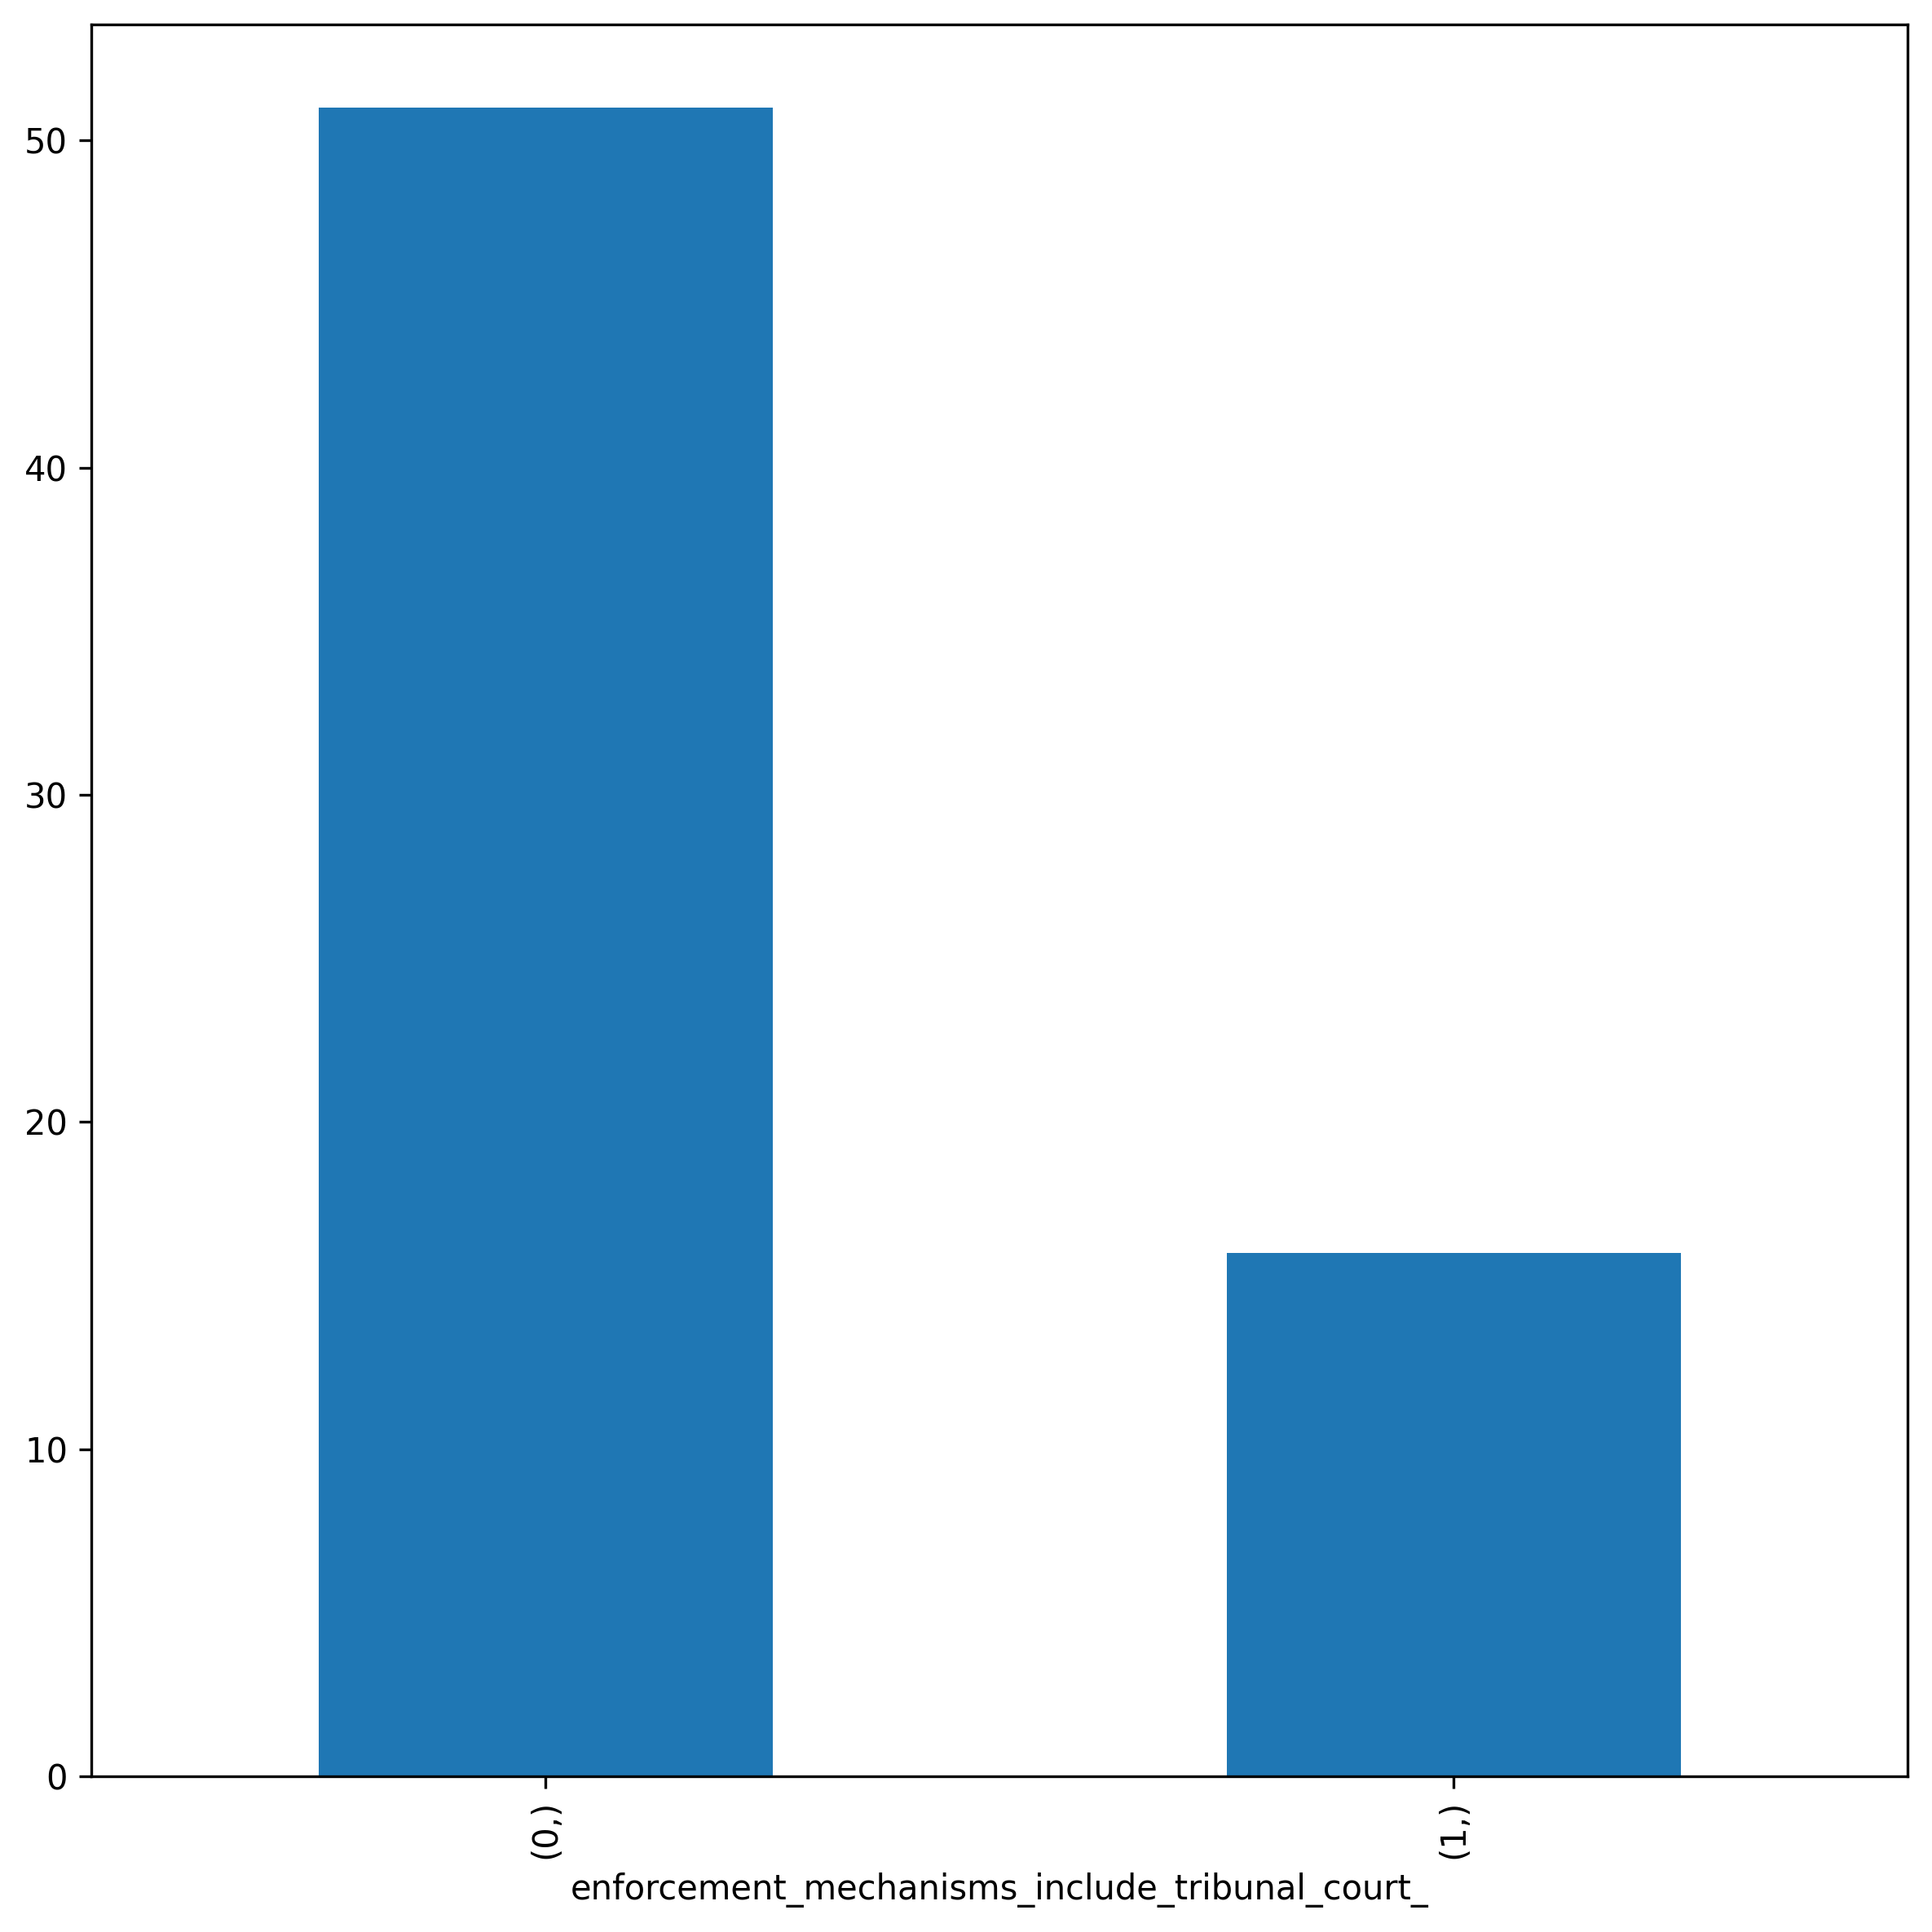

In [20]:
plt.figure(figsize=(8,8))

gov_df[court_col].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/histogram.png')
plt.show()

## Correlations

In [21]:
data_plot = gov_df.select_dtypes(include=[np.number]).dropna()

In [22]:
data_plot.describe()

Time span: Start  Time span: End  \
count         67.000000       67.000000   
mean         557.432836      949.089552   
std         1408.343646     1268.668256   
min        -4100.000000    -3300.000000   
25%         -480.000000      -27.000000   
50%         1100.000000     1560.000000   
75%         1700.000000     1900.000000   
max         1900.000000     2023.000000   

       enforcement_mechanisms_include_seizing_of_property  \
count                                          67.000000    
mean                                            0.029851    
std                                             0.171460    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       decision_making_mechanisms_include_public_meetings  \
count                                          67.000000    
mean                                            0.164179    
std                                             0.373234    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       decision_making_mechanisms_include_power_fluidity  \
count                                          67.000000   
mean                                            0.014925   
std                                             0.122169   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       decision_making_mechanisms_include_petition  \
count                                    67.000000   
mean                                      0.014925   
std                                       0.122169   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       decision_making_mechanisms_include_veto  \
count                                67.000000   
mean                                  0.044776   
std                                   0.208373   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       decision_making_mechanisms_include_representation  \
count                                          67.000000   
mean                                            0.223881   
std                                             0.419989   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       decision_making_mechanisms_include_rule_of_law  \
count                                       67.000000   
mean                                         0.029851   
std                                          0.171460   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                        

In [23]:
normalized = Normalizer().fit_transform(data_plot)

norm_df = pd.DataFrame(normalized)
norm_df.columns = data_plot.columns
norm_corr = norm_df.corr()

norm_corr.head()

Time span: Start  \
Time span: Start                                            1.000000   
Time span: End                                              0.948897   
enforcement_mechanisms_include_seizing_of_property         -0.161654   
decision_making_mechanisms_include_public_meetings         -0.225945   
decision_making_mechanisms_include_power_fluidity           0.097687   

                                                    Time span: End  \
Time span: Start                                          0.948897   
Time span: End                                            1.000000   
enforcement_mechanisms_include_seizing_of_property       -0.194837   
decision_making_mechanisms_include_public_meetings       -0.185419   
decision_making_mechanisms_include_power_fluidity         0.069341   

                                                    enforcement_mechanisms_include_seizing_of_property  \
Time span: Start                                                                            -0.161654    
Time span: End                                                                              -0.194837    
enforcement_mechanisms_include_seizing_of_property                                           1.000000    
decision_making_mechanisms_include_public_meetings                                           0.552342    
decision_making_mechanisms_include_power_fluidity                                           -0.018643    

                                                    decision_making_mechanisms_include_public_meetings  \
Time span: Start                                                                            -0.225945    
Time span: End                                                                              -0.185419    
enforcement_mechanisms_include_seizing_of_property                                           0.552342    
decision_making_mechanisms_include_public_meetings                                           1.000000    
decision_making_mechanisms_include_power_fluidity                                           -0.043711    

                                                    decision_making_mechanisms_include_power_fluidity  \
Time span: Start                                                                             0.097687   
Time span: End                                                                               0.069341   
enforcement_mechanisms_include_seizing_of_property                                          -0.018643   
decision_making_mechanisms_include_public_meetings                                          -0.043711   
decision_making_mechanisms_include_power_fluidity                                            1.000000   

                                                    decision_making_mechanisms_include_petition  \
Time span: Start                                                                      -0.193038   
Time span: End                                                                        -0.170193   
enforcement_mechanisms_include_seizing_of_property                                    -0.018643   
decision_making_mechanisms_include_public_meetings                                    -0.043711   
decision_making_mechanisms_include_power_fluidity                                     -0.015152   

                                                    decision_making_mechanisms_include_veto  \
Time span: Start                                                                  -0.238660   
Time span: End                                                                    -0.219285   
enforcement_mechanisms_include_seizing_of_property                                 0.695228   
decision_making_mechanisms_include_public_meetings                                 0.390600   
decision_making_mechanisms_include_power_fluidity                                 -0.024372   

                                                    decision_making_mechanisms_include_representation  \
Time span: Start      

In [24]:
courts_corr = norm_corr[court_col]

In [25]:
courts_corr

enforcement_mechanisms_include_tribunal_court_
Time span: Start                                                                         -0.248561
Time span: End                                                                           -0.204819
enforcement_mechanisms_include_seizing_of_property                                        0.428796
decision_making_mechanisms_include_public_meetings                                        0.160456
decision_making_mechanisms_include_power_fluidity                                        -0.053290
decision_making_mechanisms_include_petition                                               0.042748
decision_making_mechanisms_include_veto                                                   0.290206
decision_making_mechanisms_include_representation                                        -0.083866
decision_making_mechanisms_include_rule_of_law                                            0.404257
enforcement_mechanisms_include_appeal                                                     0.170868
enforcement_mechanisms_include_tribunal_court_                                            1.000000
decision_making_mechanisms_include_kingchief-as...                                       -0.097744
enforcement_mechanisms_include_destruction_of_p...                                       -0.075874
decision_making_mechanisms_include_remunerated_...                                        0.301869
decision_making_mechanisms_include_voting                                                 0.272333
enforcement_mechanisms_include_mediation                                                  0.128916
access_mechanisms_include_matrilineality                                                 -0.087015
decision_making_mechanisms_include_ratification...                                        0.098337
decision_making_mechanisms_include_checks_and_b...                                       -0.054321
enforcement_mechanisms_include_judicial_review                                            0.426636
access_mechanisms_include_patronage_for_office                                           -0.048834
decision_making_mechanisms_include_plurality_vo...                                        0.428796
access_mechanisms_include_age_boundaries                                                  0.298729
enforcement_mechanisms_include_monitoring                                                 0.414338
decision_making_mechanisms_include_dual-sex_pol...                                        0.017574
decision_making_mechanisms_include_word_of_mouth                                          0.114123
decision_making_mechanisms_include_assembly_cen...                                        0.437184
enforcement_mechanisms_include_graduated_sanctions                                       -0.053290
access_mechanisms_include_blood_relations                                                 0.296966
decision_making_mechanisms_include_agenda_setting                                         0.266611
enforcement_mechanisms_include_suspension_expul...                                        0.587346
decision_making_mechanisms_include_group_voting                                          -0.053290
decision_making_mechanisms_include_consent                                                0.305060
decision_making_mechanisms_include_autocratic_l...                                       -0.087865
access_mechanisms_include_life_appointment                                                0.026455
access_mechanisms_include_heredity                                                       -0.212822
decision_making_mechanisms_include_coalition                                             -0.053290
decision_making_mechanisms_include_assembly_elite                                         0.392878
decision_making_mechanisms_include_delegation                                             0.242943
decision_making_mechanisms_include_quorum                                                 0.

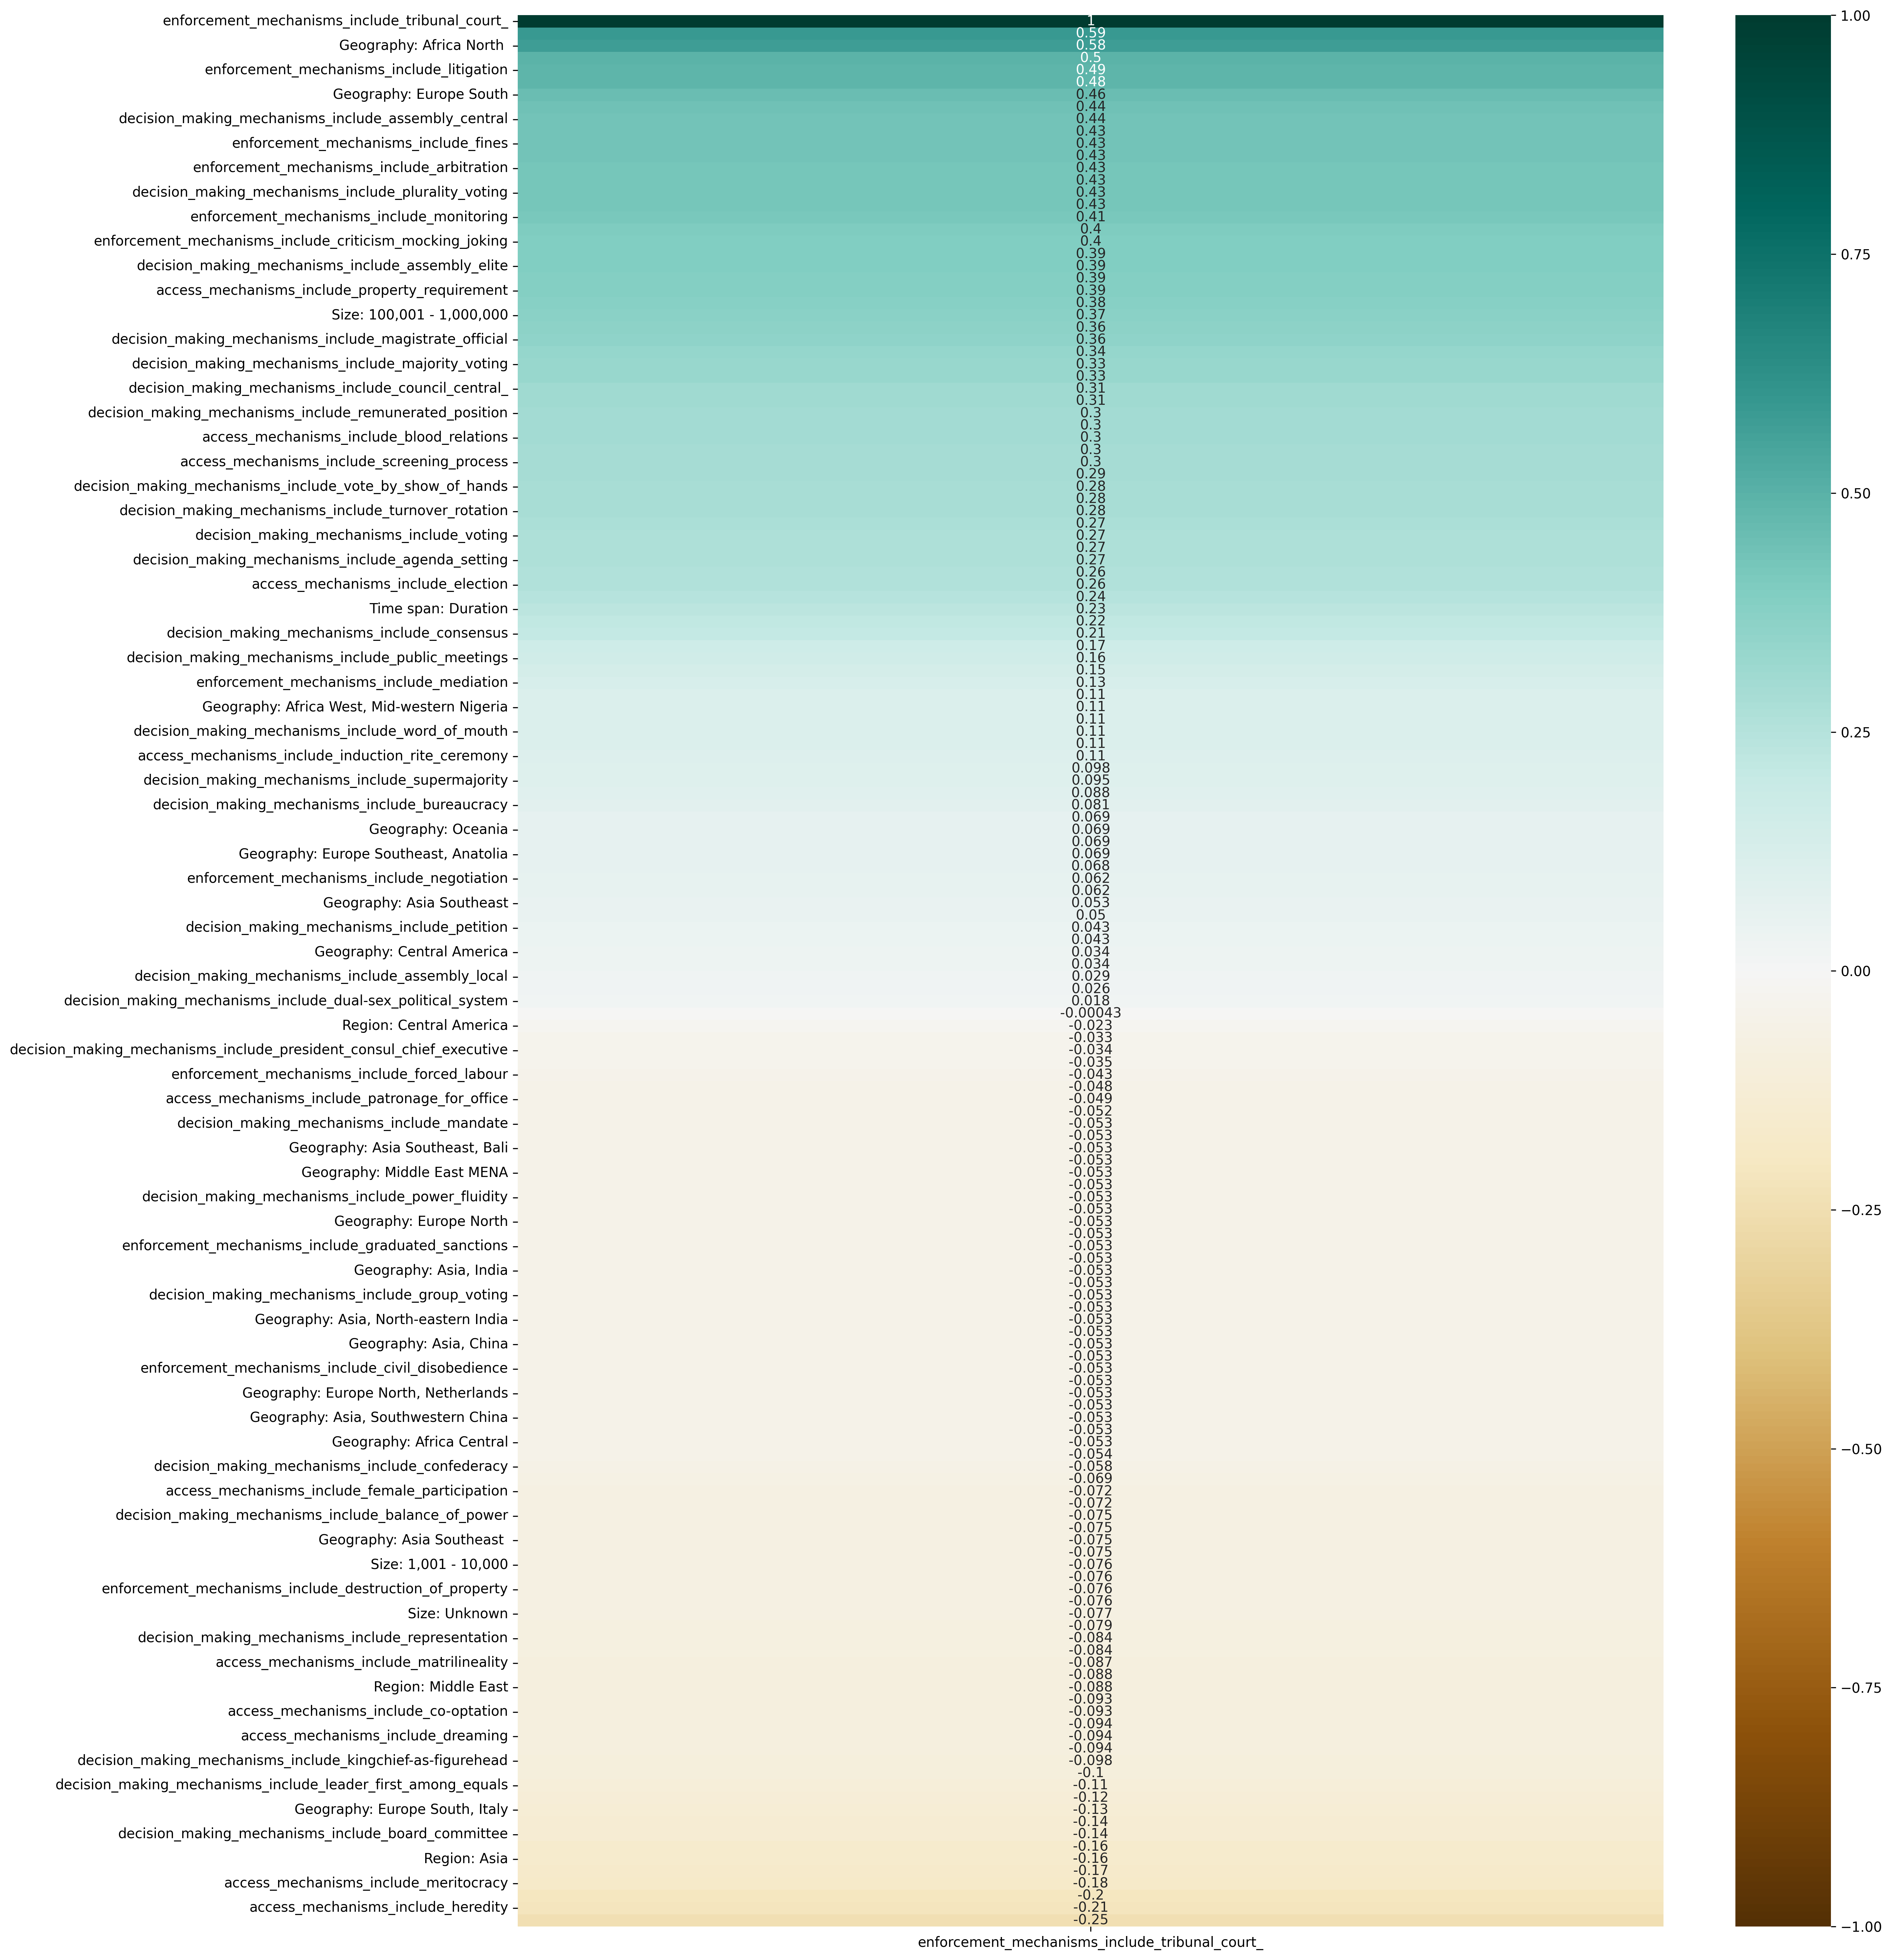

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(
    courts_corr.sort_values(by='enforcement_mechanisms_include_tribunal_court_', ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/courts_corr.png')
plt.show()

## Courts Analysis: Mechanisms

### Access

In [30]:
access_courts_corr = courts_corr[courts_corr.index.str.startswith('access')]

In [31]:
access_courts_corr

enforcement_mechanisms_include_tribunal_court_
access_mechanisms_include_matrilineality                                                 -0.087015
access_mechanisms_include_patronage_for_office                                           -0.048834
access_mechanisms_include_age_boundaries                                                  0.298729
access_mechanisms_include_blood_relations                                                 0.296966
access_mechanisms_include_life_appointment                                                0.026455
access_mechanisms_include_heredity                                                       -0.212822
access_mechanisms_include_popularity_                                                    -0.093509
access_mechanisms_include_divine_right                                                    0.034011
access_mechanisms_include_co-optation                                                    -0.093262
access_mechanisms_include_female_participation                                           -0.071576
access_mechanisms_include_election                                                        0.261494
access_mechanisms_include_screening_process                                               0.296117
access_mechanisms_include_gerontocracy                                                   -0.117713
access_mechanisms_include_payment_for_occupying...                                       -0.093104
access_mechanisms_include_property_requirement                                            0.389062
access_mechanisms_include_enfranchisement                                                -0.075922
access_mechanisms_include_open_political_unit                                            -0.078597
access_mechanisms_include_dreaming                                                       -0.093656
access_mechanisms_include_matriarchy                                                     -0.048478
access_mechanisms_include_meritocracy                                                    -0.178043
access_mechanisms_include_lottery_random_selection                                        0.261525
access_mechanisms_include_induction_rite_ceremony                                         0.106870

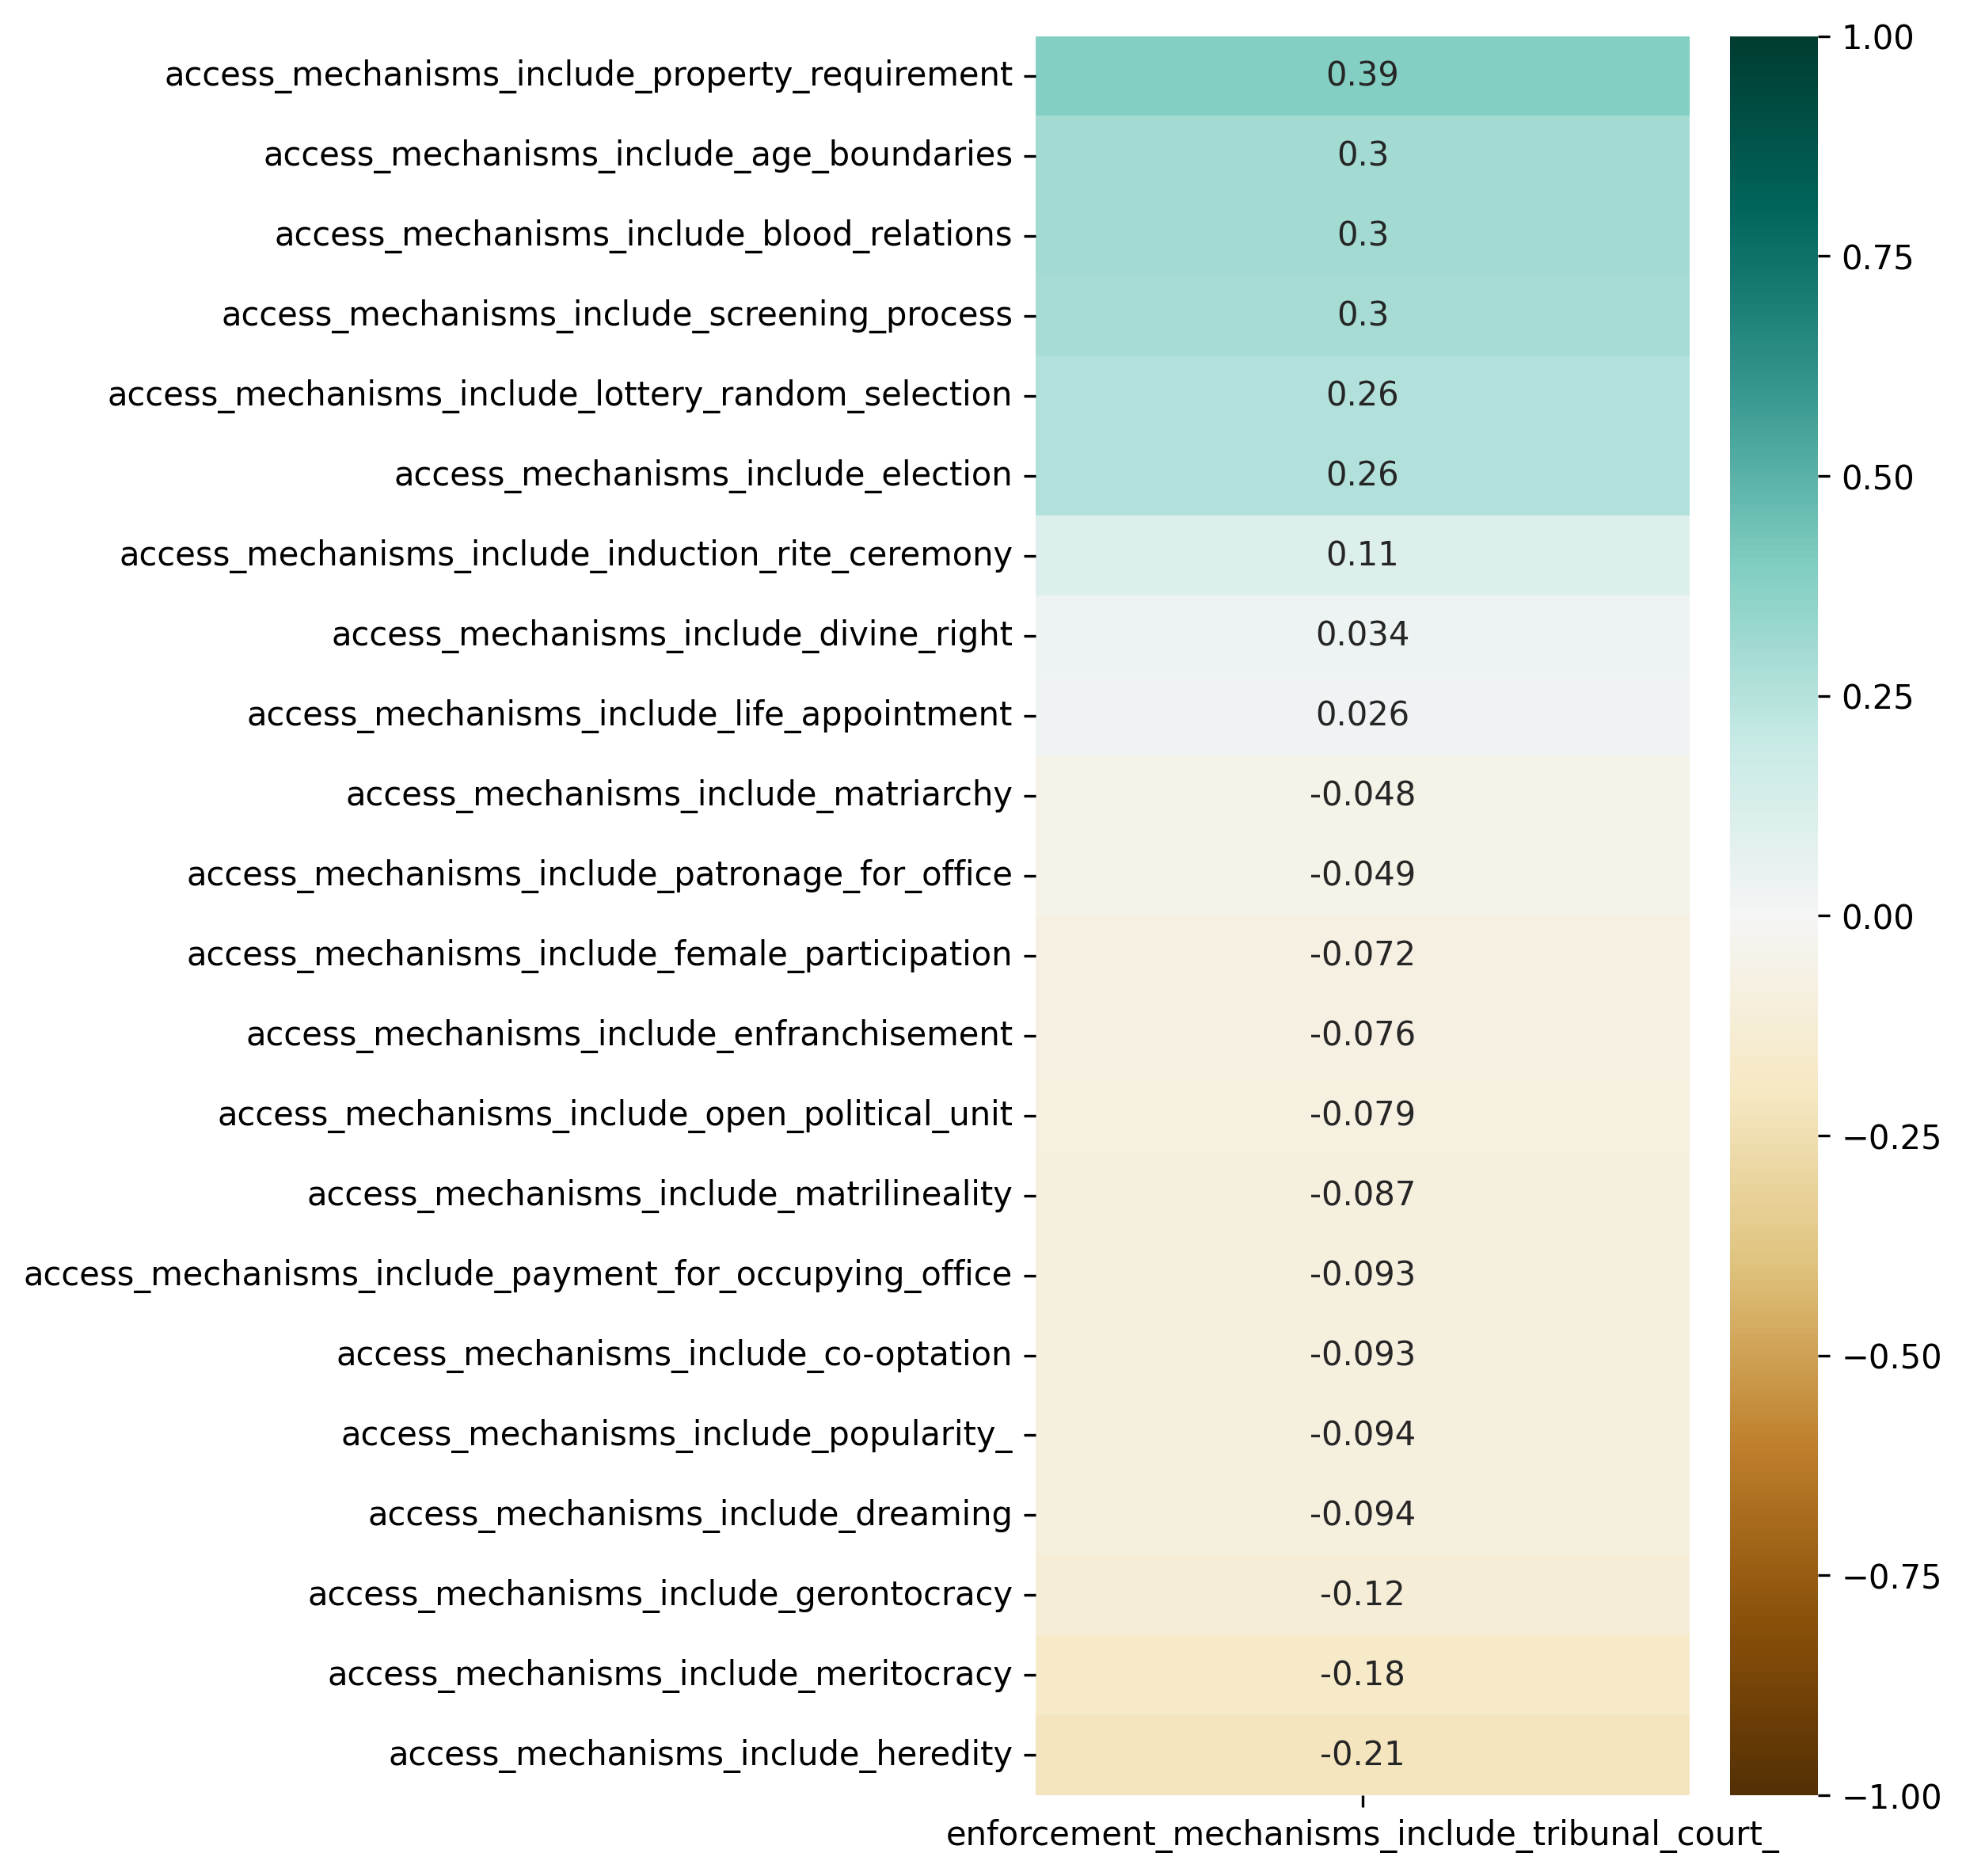

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(
    access_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/access_courts_corr.png')
plt.show()

### Decision Making

In [36]:
dm_courts_corr = courts_corr[courts_corr.index.str.startswith('decision_making')]

In [37]:
dm_courts_corr

enforcement_mechanisms_include_tribunal_court_
decision_making_mechanisms_include_public_meetings                                        0.160456
decision_making_mechanisms_include_power_fluidity                                        -0.053290
decision_making_mechanisms_include_petition                                               0.042748
decision_making_mechanisms_include_veto                                                   0.290206
decision_making_mechanisms_include_representation                                        -0.083866
decision_making_mechanisms_include_rule_of_law                                            0.404257
decision_making_mechanisms_include_kingchief-as...                                       -0.097744
decision_making_mechanisms_include_remunerated_...                                        0.301869
decision_making_mechanisms_include_voting                                                 0.272333
decision_making_mechanisms_include_ratification...                                        0.098337
decision_making_mechanisms_include_checks_and_b...                                       -0.054321
decision_making_mechanisms_include_plurality_vo...                                        0.428796
decision_making_mechanisms_include_dual-sex_pol...                                        0.017574
decision_making_mechanisms_include_word_of_mouth                                          0.114123
decision_making_mechanisms_include_assembly_cen...                                        0.437184
decision_making_mechanisms_include_agenda_setting                                         0.266611
decision_making_mechanisms_include_group_voting                                          -0.053290
decision_making_mechanisms_include_consent                                                0.305060
decision_making_mechanisms_include_autocratic_l...                                       -0.087865
decision_making_mechanisms_include_coalition                                             -0.053290
decision_making_mechanisms_include_assembly_elite                                         0.392878
decision_making_mechanisms_include_delegation                                             0.242943
decision_making_mechanisms_include_quorum                                                 0.296117
decision_making_mechanisms_include_leader_first...                                       -0.113187
decision_making_mechanisms_include_balance_of_p...                                       -0.074612
decision_making_mechanisms_include_vote_by_proxy                                         -0.075791
decision_making_mechanisms_include_constitution                                           0.362894
decision_making_mechanisms_include_autocratic_l...                                       -0.000426
decision_making_mechanisms_include_turnover_rot...                                        0.281646
decision_making_mechanisms_include_consultation                                          -0.068523
decision_making_mechanisms_include_oath                                                   0.484583
decision_making_mechanisms_include_supermajority                                          0.094684
decision_making_mechanisms_include_council_cent...                                        0.312114
decision_making_mechanisms_include_lobbying                                               0.114123
decision_making_mechanisms_include_alliance                                              -0.072423
decision_making_mechanisms_include_board_committee                                       -0.140243
decision_making_mechanisms_include_secret_ballot                                          0.284352
decision_making_mechanisms_include_gathering                                             -0.075038
decision_making_mechanisms_include_unanimity                                              0.068696
decision_making_mechanisms_include_frequent_and...                                        0.

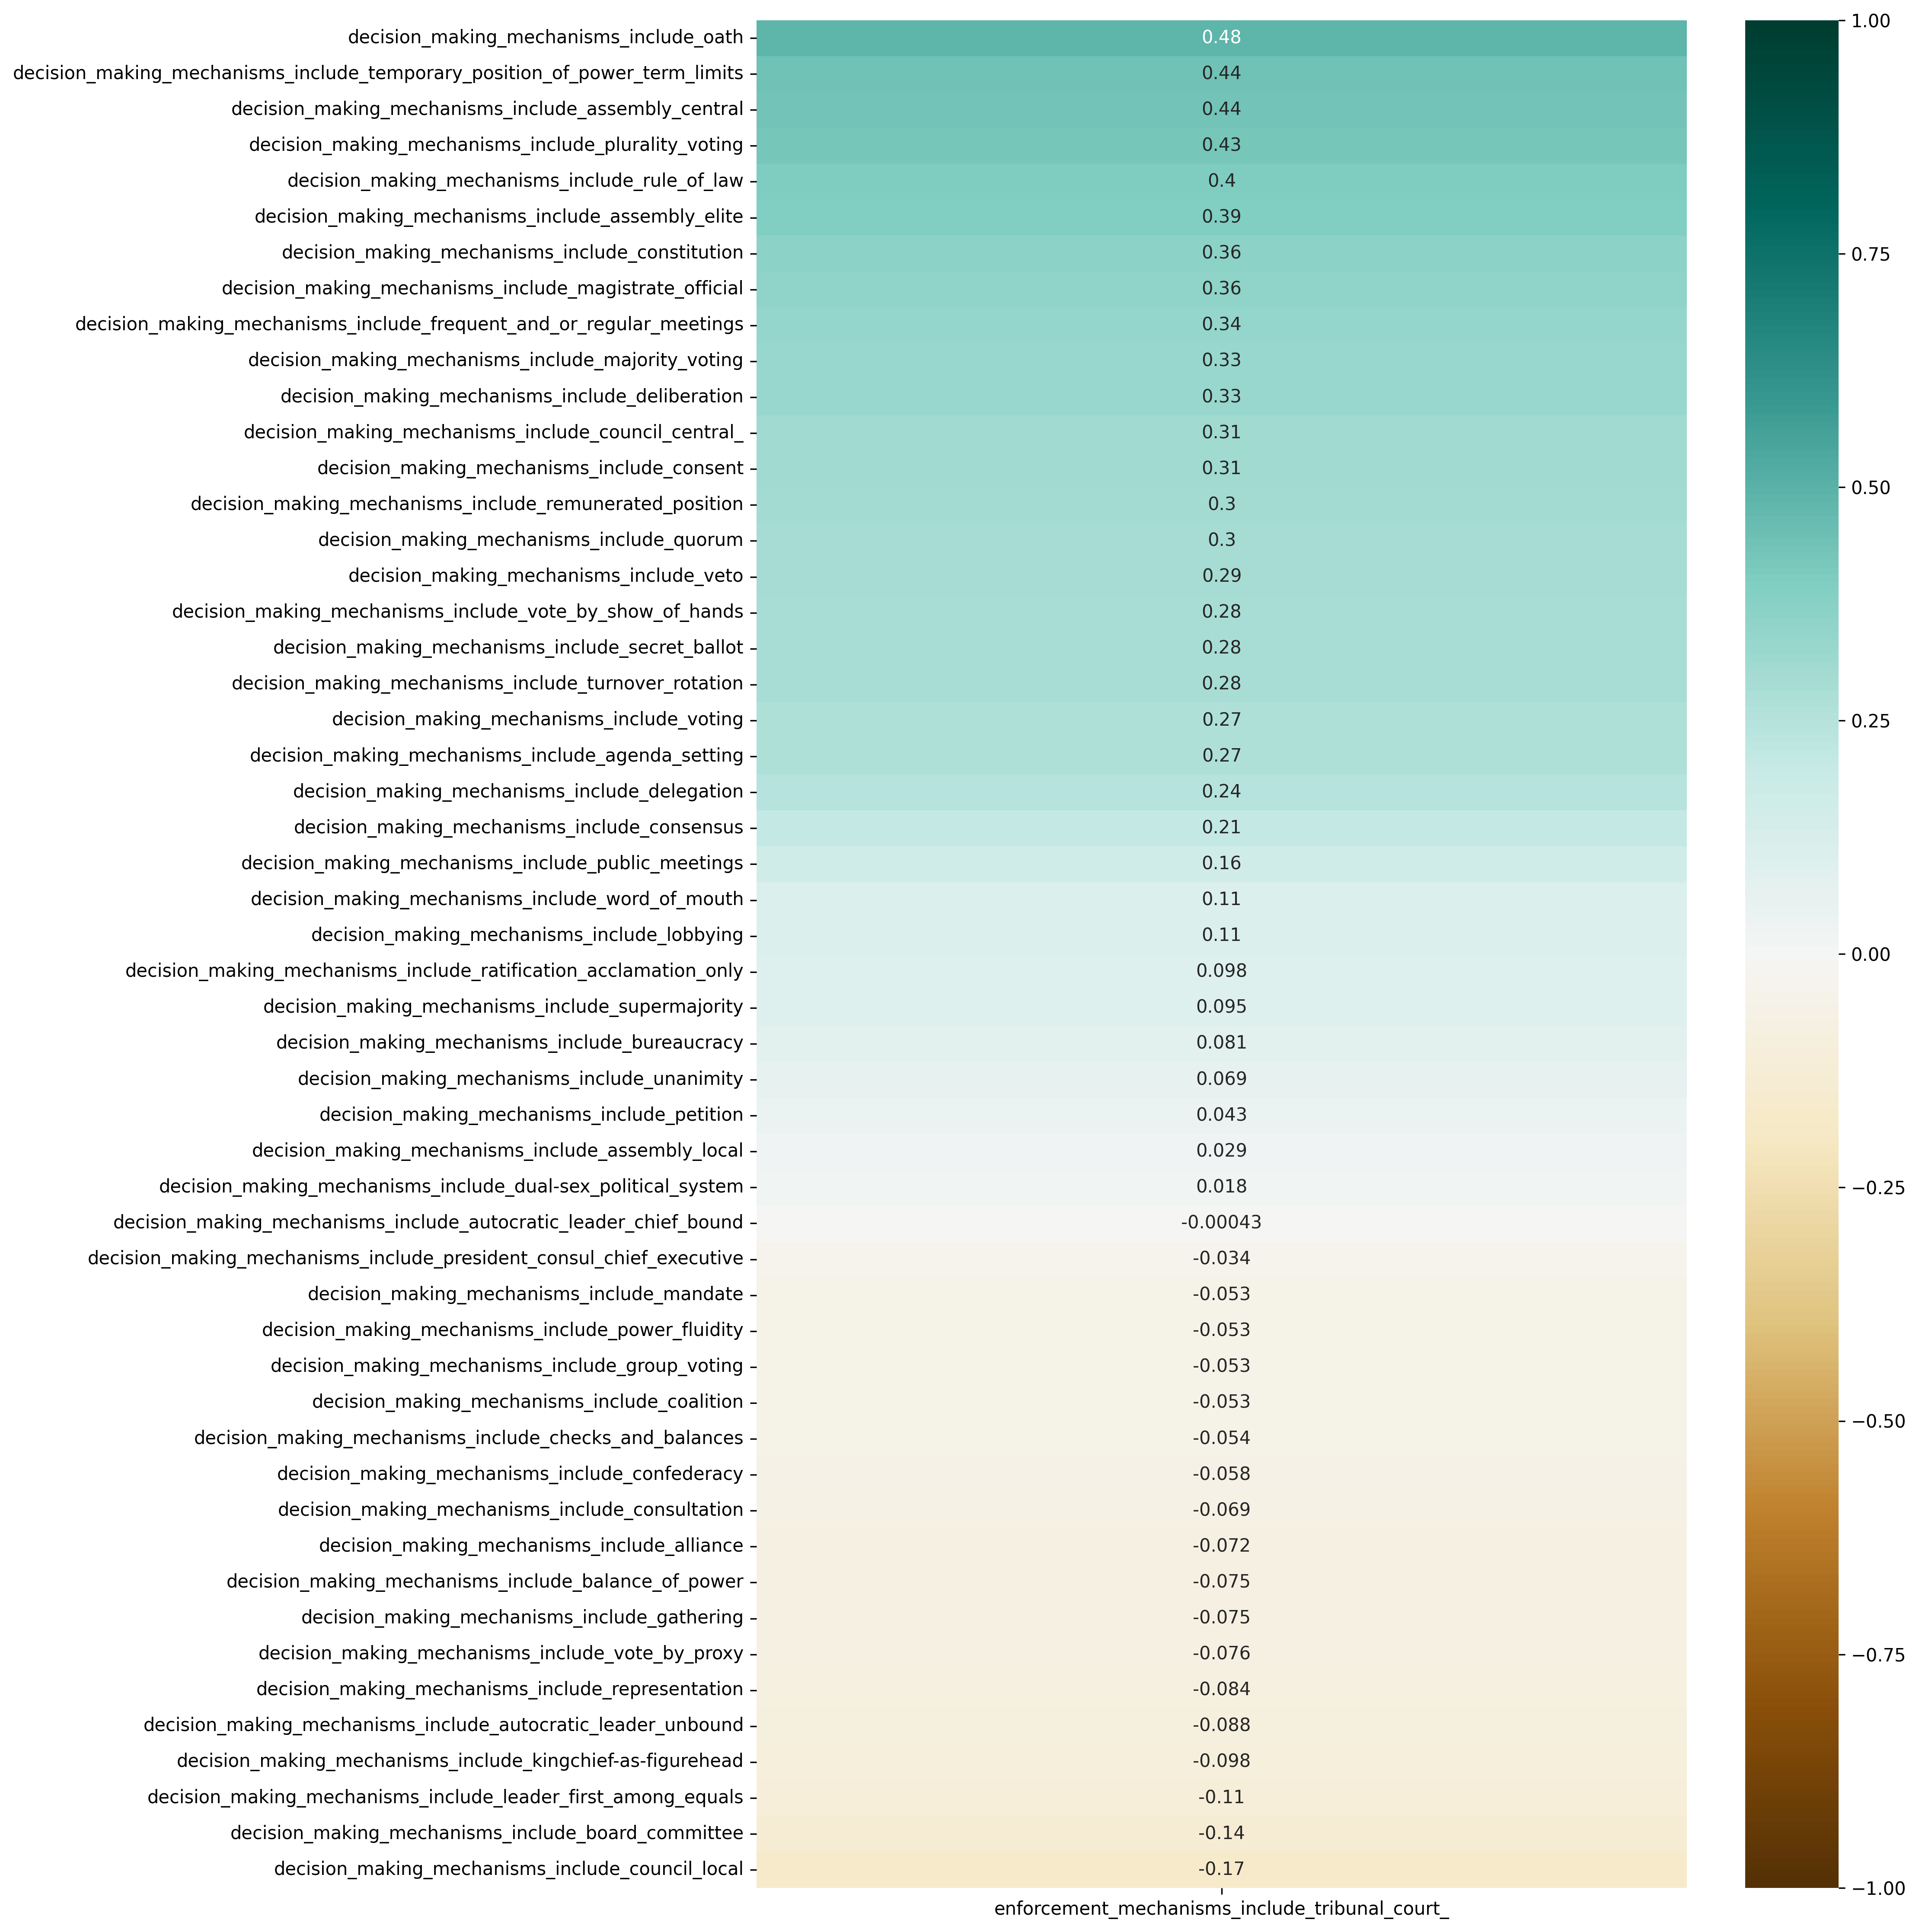

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dm_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/dm_courts_corr.png')
plt.show()

### Enforcement

In [39]:
enforcement_courts_corr = courts_corr[courts_corr.index.str.startswith('enforcement')]

In [40]:
enforcement_courts_corr

enforcement_mechanisms_include_tribunal_court_
enforcement_mechanisms_include_seizing_of_property                                        0.428796
enforcement_mechanisms_include_appeal                                                     0.170868
enforcement_mechanisms_include_tribunal_court_                                            1.000000
enforcement_mechanisms_include_destruction_of_p...                                       -0.075874
enforcement_mechanisms_include_mediation                                                  0.128916
enforcement_mechanisms_include_judicial_review                                            0.426636
enforcement_mechanisms_include_monitoring                                                 0.414338
enforcement_mechanisms_include_graduated_sanctions                                       -0.053290
enforcement_mechanisms_include_suspension_expul...                                        0.587346
enforcement_mechanisms_include_capital_punishment                                         0.389943
enforcement_mechanisms_include_jury_judge                                                 0.378369
enforcement_mechanisms_include_self-help                                                  0.430010
enforcement_mechanisms_include_police                                                     0.067823
enforcement_mechanisms_include_reputational_risk                                         -0.035051
enforcement_mechanisms_include_paying_damages_c...                                        0.434332
enforcement_mechanisms_include_negotiation                                                0.062301
enforcement_mechanisms_include_criticism_mockin...                                        0.398046
enforcement_mechanisms_include_civil_disobedience                                        -0.053290
enforcement_mechanisms_include_corporal_punishm...                                        0.394566
enforcement_mechanisms_include_litigation                                                 0.486341
enforcement_mechanisms_include_exit                                                      -0.032985
enforcement_mechanisms_include_fines                                                      0.430866
enforcement_mechanisms_include_scrutiny_of_offi...                                        0.274628
enforcement_mechanisms_include_forced_labour                                             -0.043488
enforcement_mechanisms_include_arbitration                                                0.428968

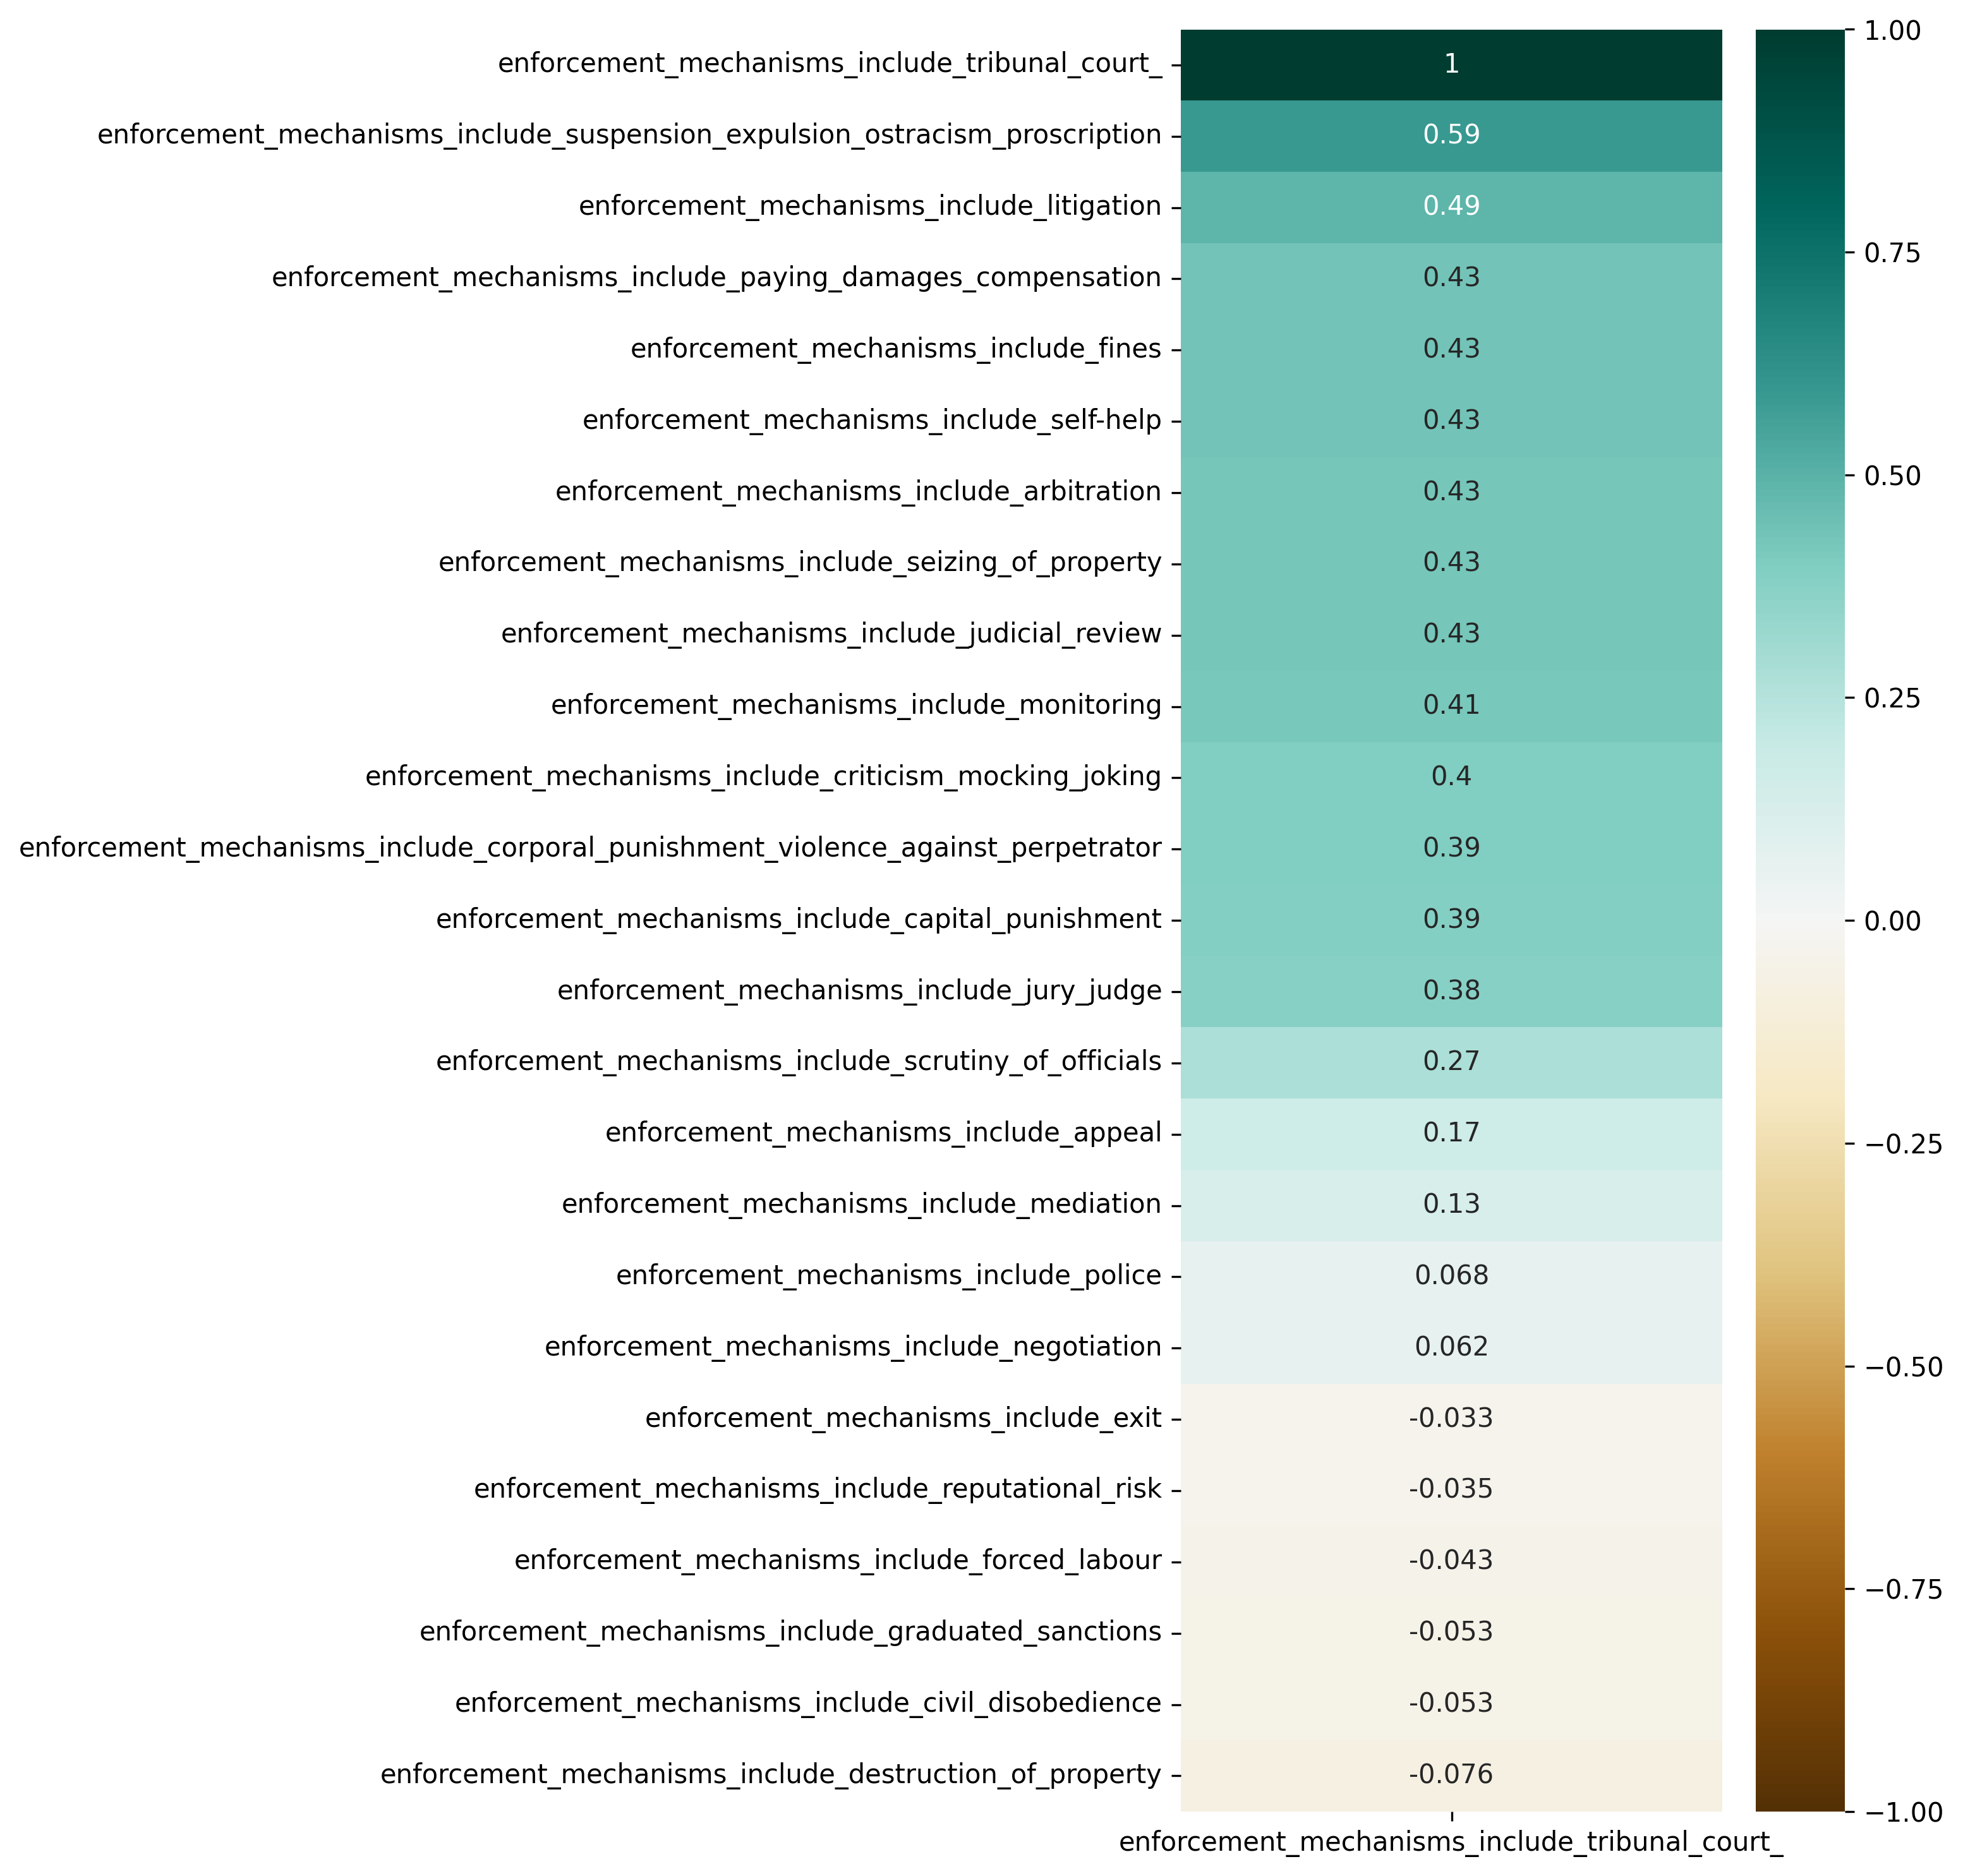

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(
    enforcement_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/enforcement_courts_corr.png')
plt.show()

## Courts Analysis: Size

In [42]:
size_cols = [col for col in col_list if col.startswith('Size:')]
size_cols

['Size: 100 - 1,000',
 'Size: 1,001 - 10,000',
 'Size: 10,001 - 100,000',
 'Size: 100,001 - 1,000,000',
 'Size: 1,000,001 - 10,000,000',
 'Size: 10,000,000+',
 'Size: Unknown']

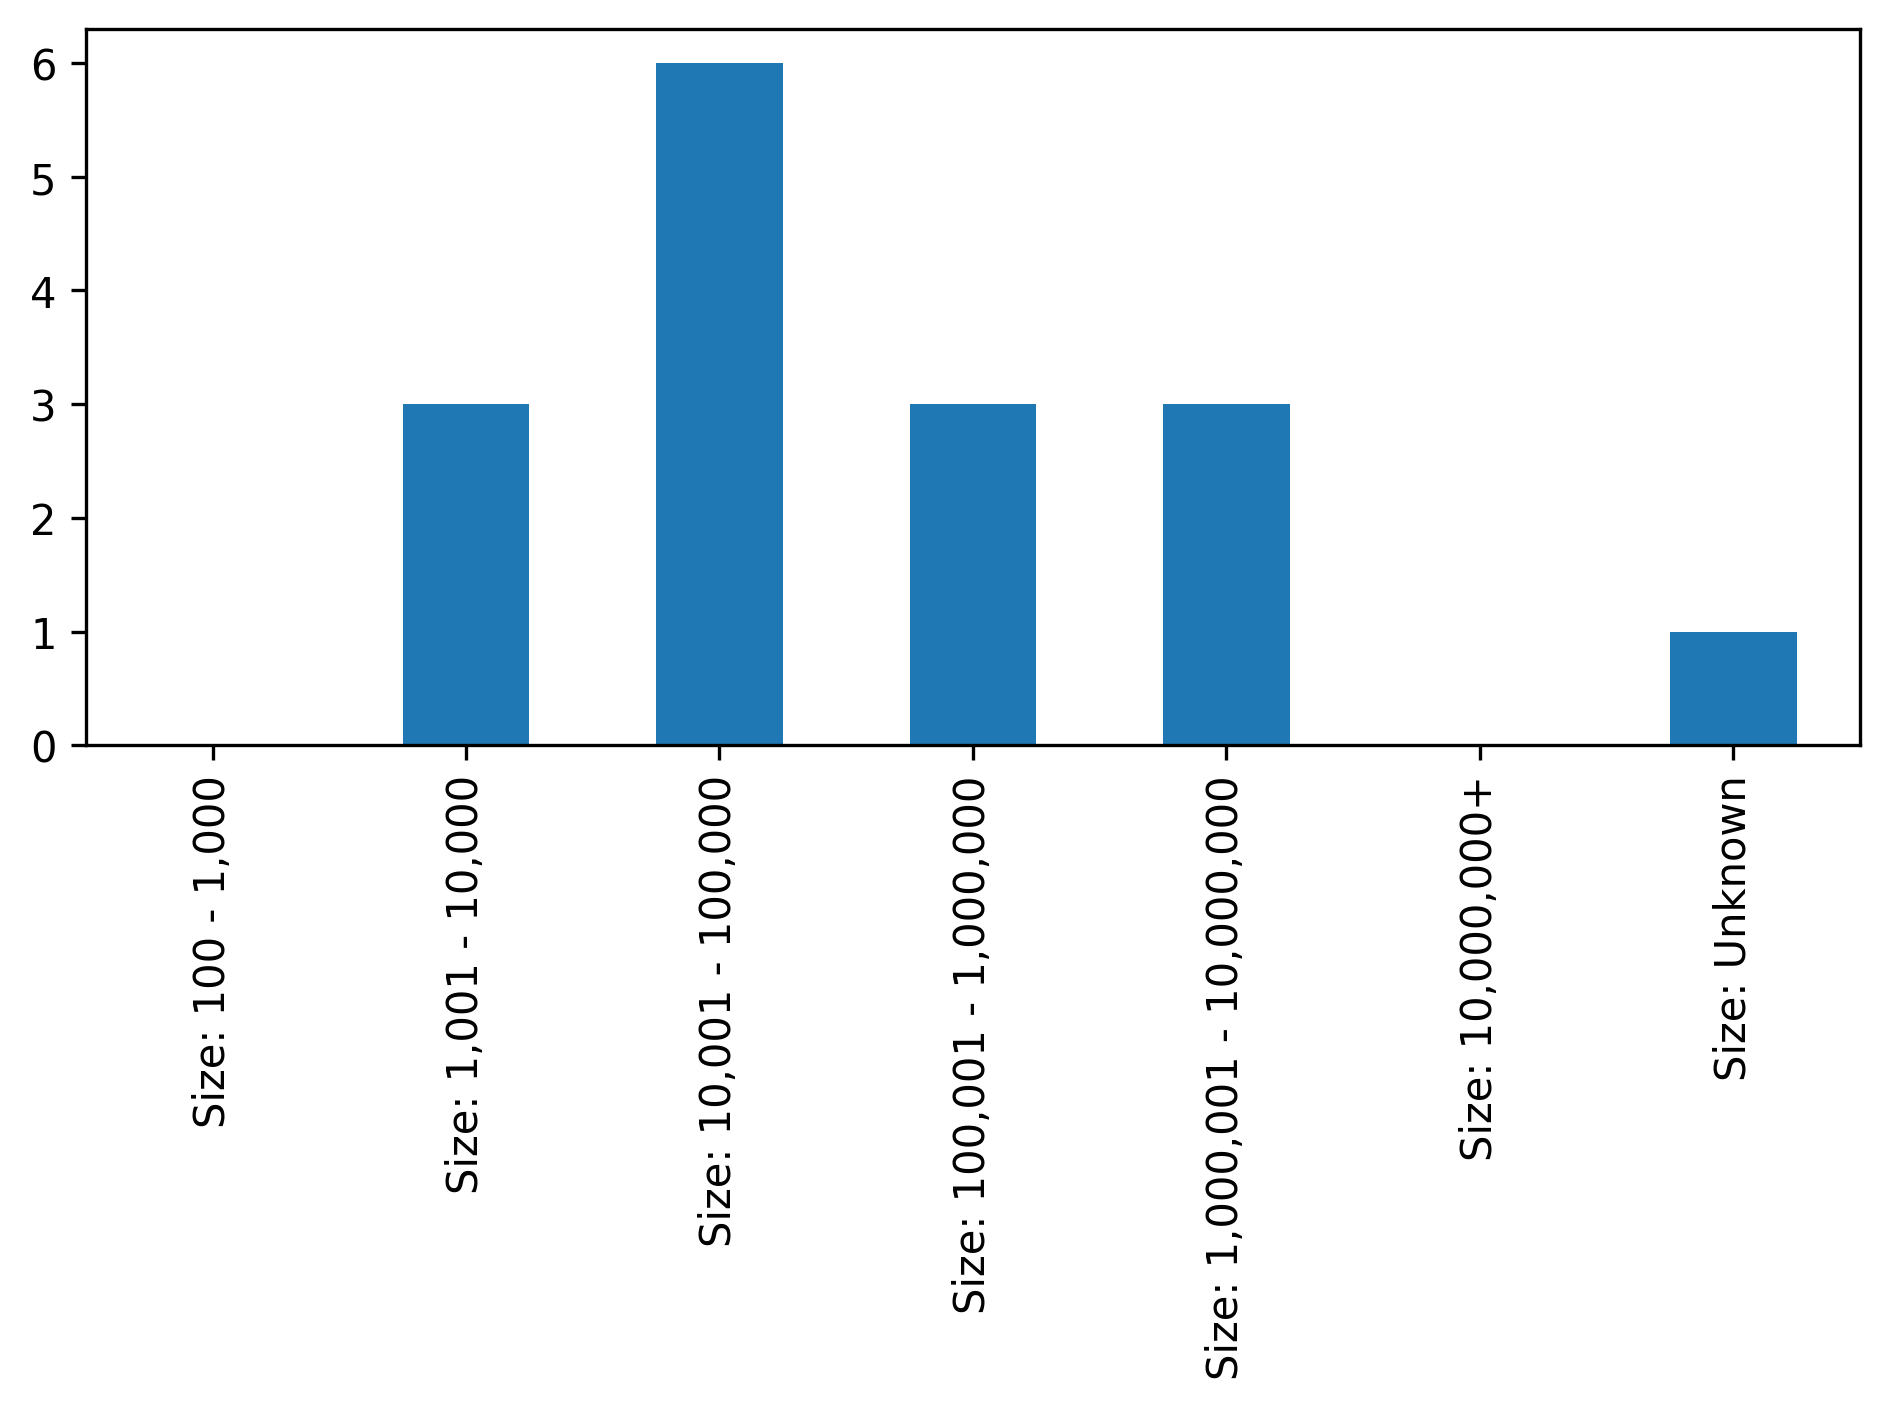

In [43]:
# Size histogram
courts_df[size_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/courts_size_histogram.png')
plt.show()

In [44]:
size_courts_corr = courts_corr[courts_corr.index.str.startswith('Size:')]

In [45]:
size_courts_corr

enforcement_mechanisms_include_tribunal_court_
Size: 100 - 1,000                                                  -0.053290
Size: 1,001 - 10,000                                               -0.075754
Size: 10,001 - 100,000                                              0.114364
Size: 100,001 - 1,000,000                                           0.371961
Size: 1,000,001 - 10,000,000                                        0.050222
Size: 10,000,000+                                                  -0.099536
Size: Unknown                                                      -0.076565

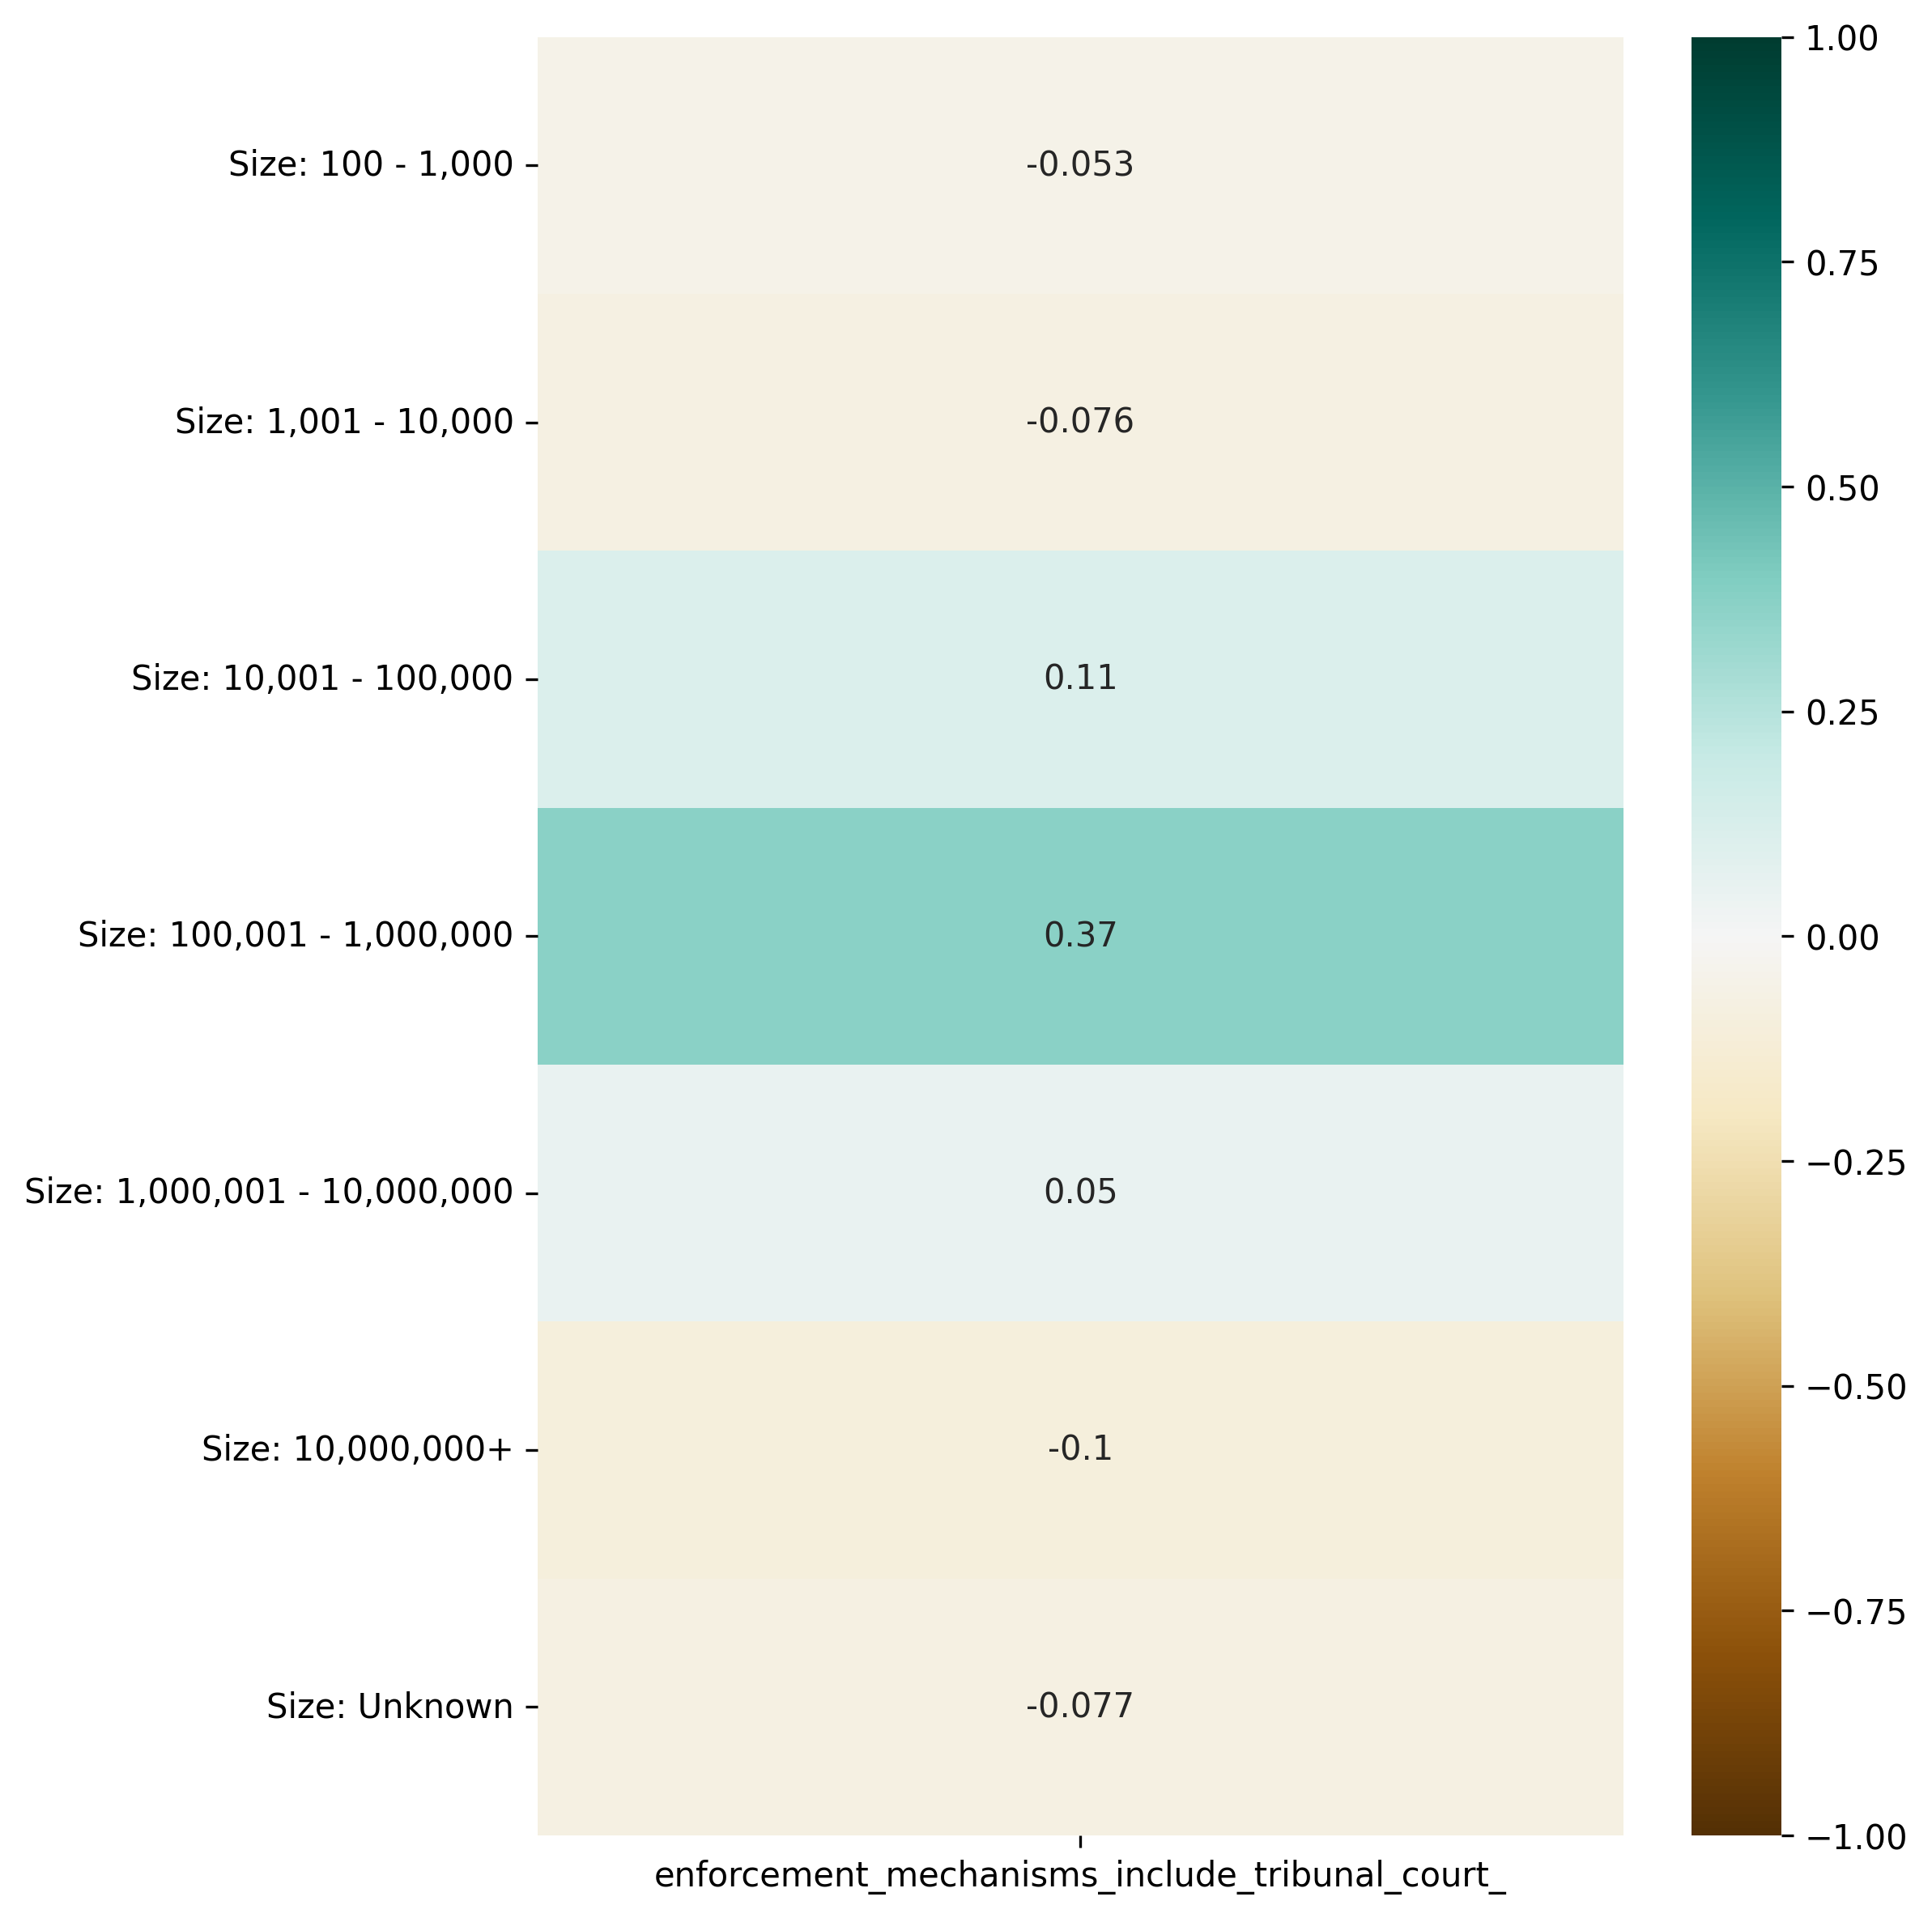

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(
    size_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/courts_size_corr.png')
plt.show()

## Councils Analysis: Region

In [47]:
region_cols = [col for col in col_list if col.startswith('Region:')]
region_cols

['Region: Africa',
 'Region: Europe',
 'Region: Asia',
 'Region: Middle East',
 'Region: North America',
 'Region: Central America',
 'Region: South America',
 'Region: Oceania']

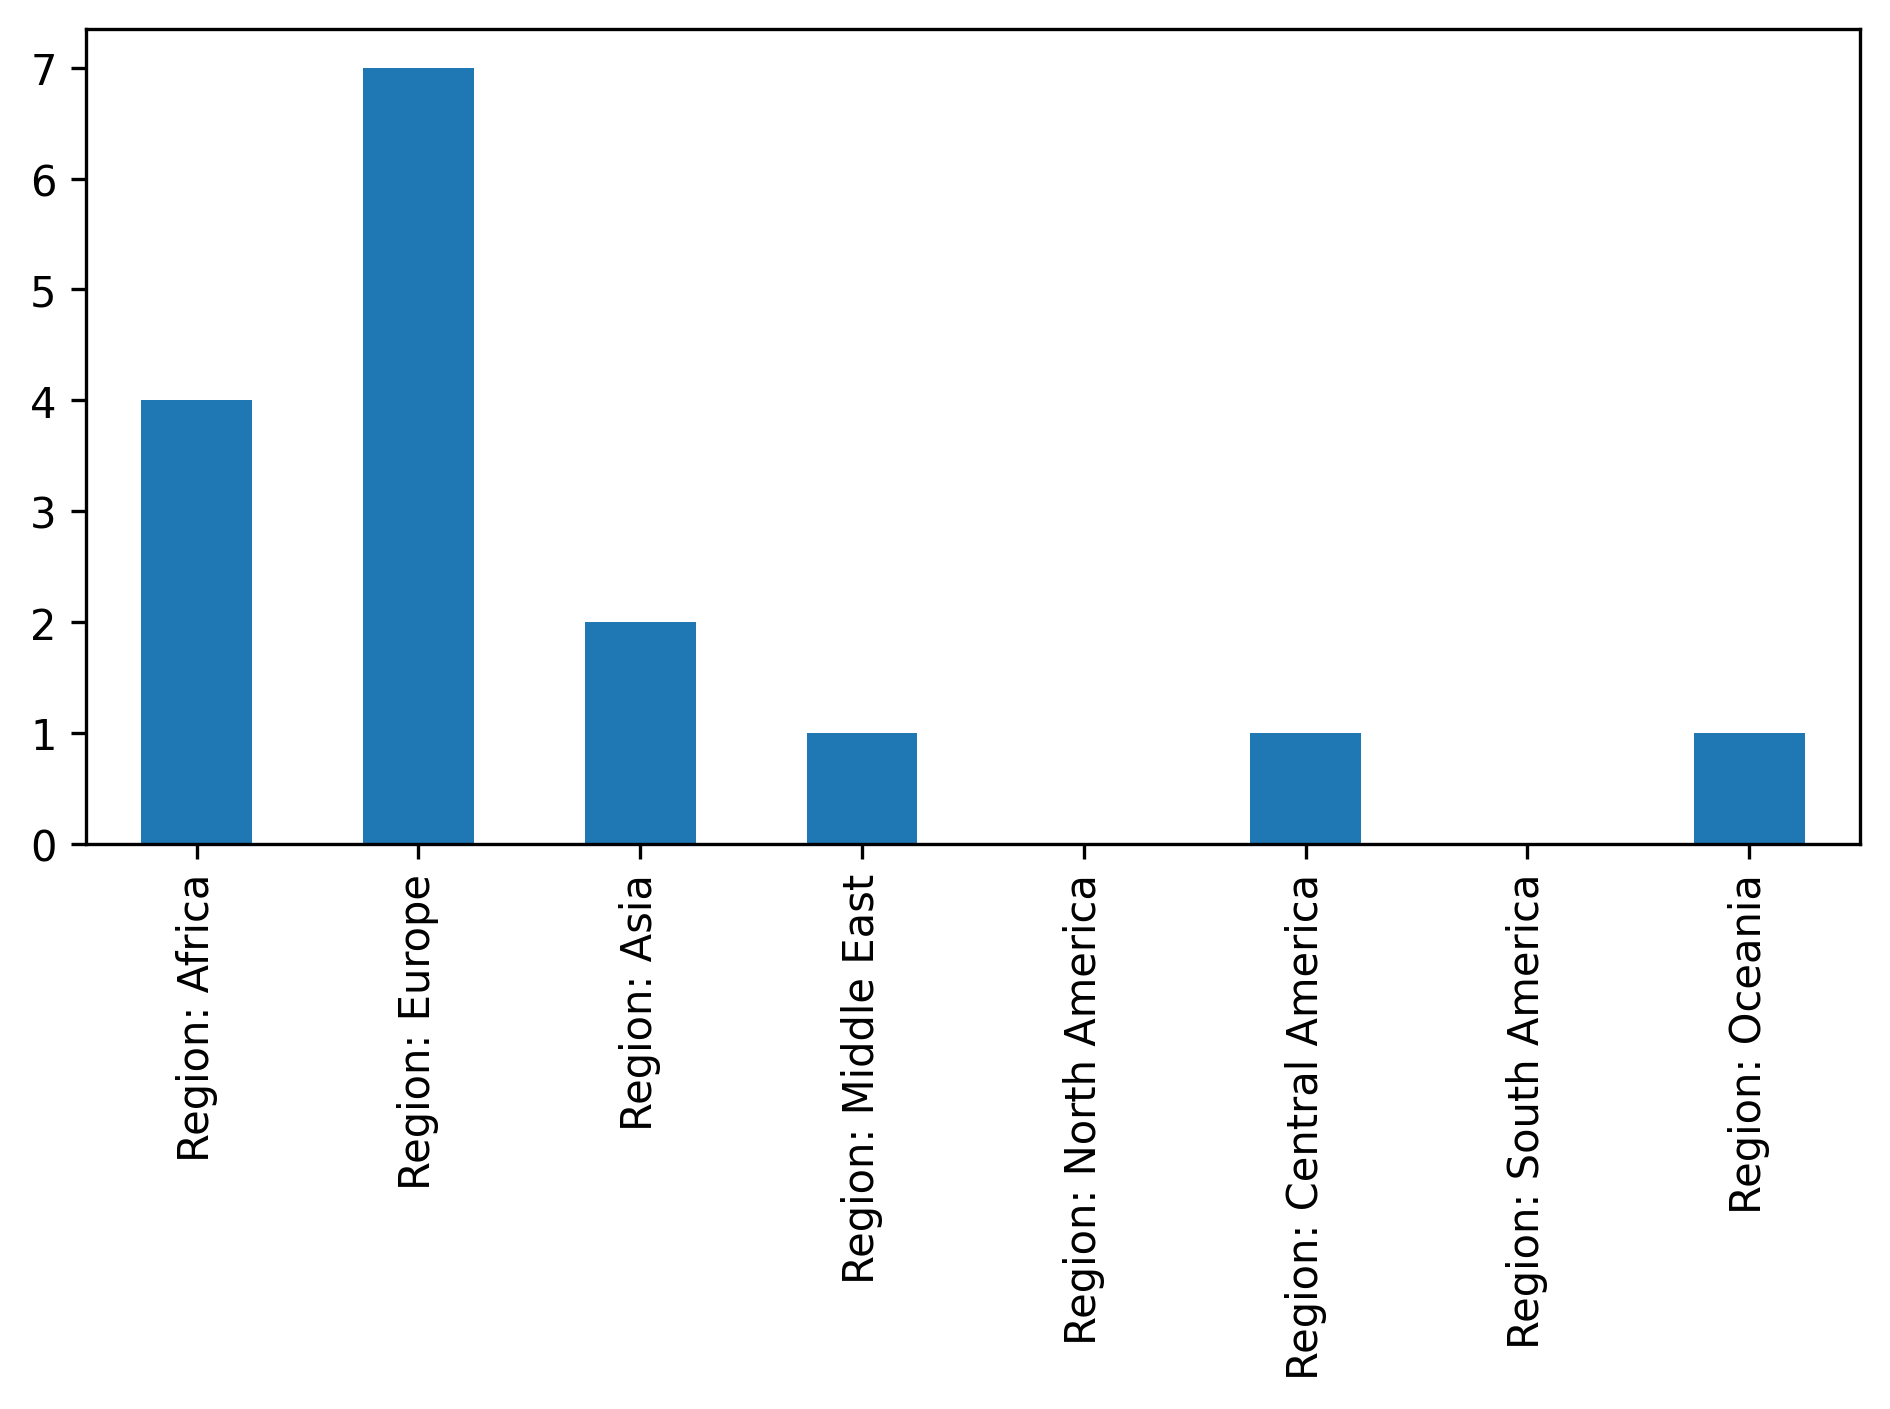

In [49]:
# Region histogram
courts_df[region_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/courts_region_histogram.png')
plt.show()

In [50]:
region_courts_corr = courts_corr[courts_corr.index.str.startswith('Region:')]

In [51]:
region_courts_corr

enforcement_mechanisms_include_tribunal_court_
Region: Africa                                                 0.498555
Region: Europe                                                 0.215861
Region: Asia                                                  -0.162373
Region: Middle East                                           -0.088404
Region: North America                                         -0.159060
Region: Central America                                       -0.022505
Region: South America                                         -0.053290
Region: Oceania                                                0.069314

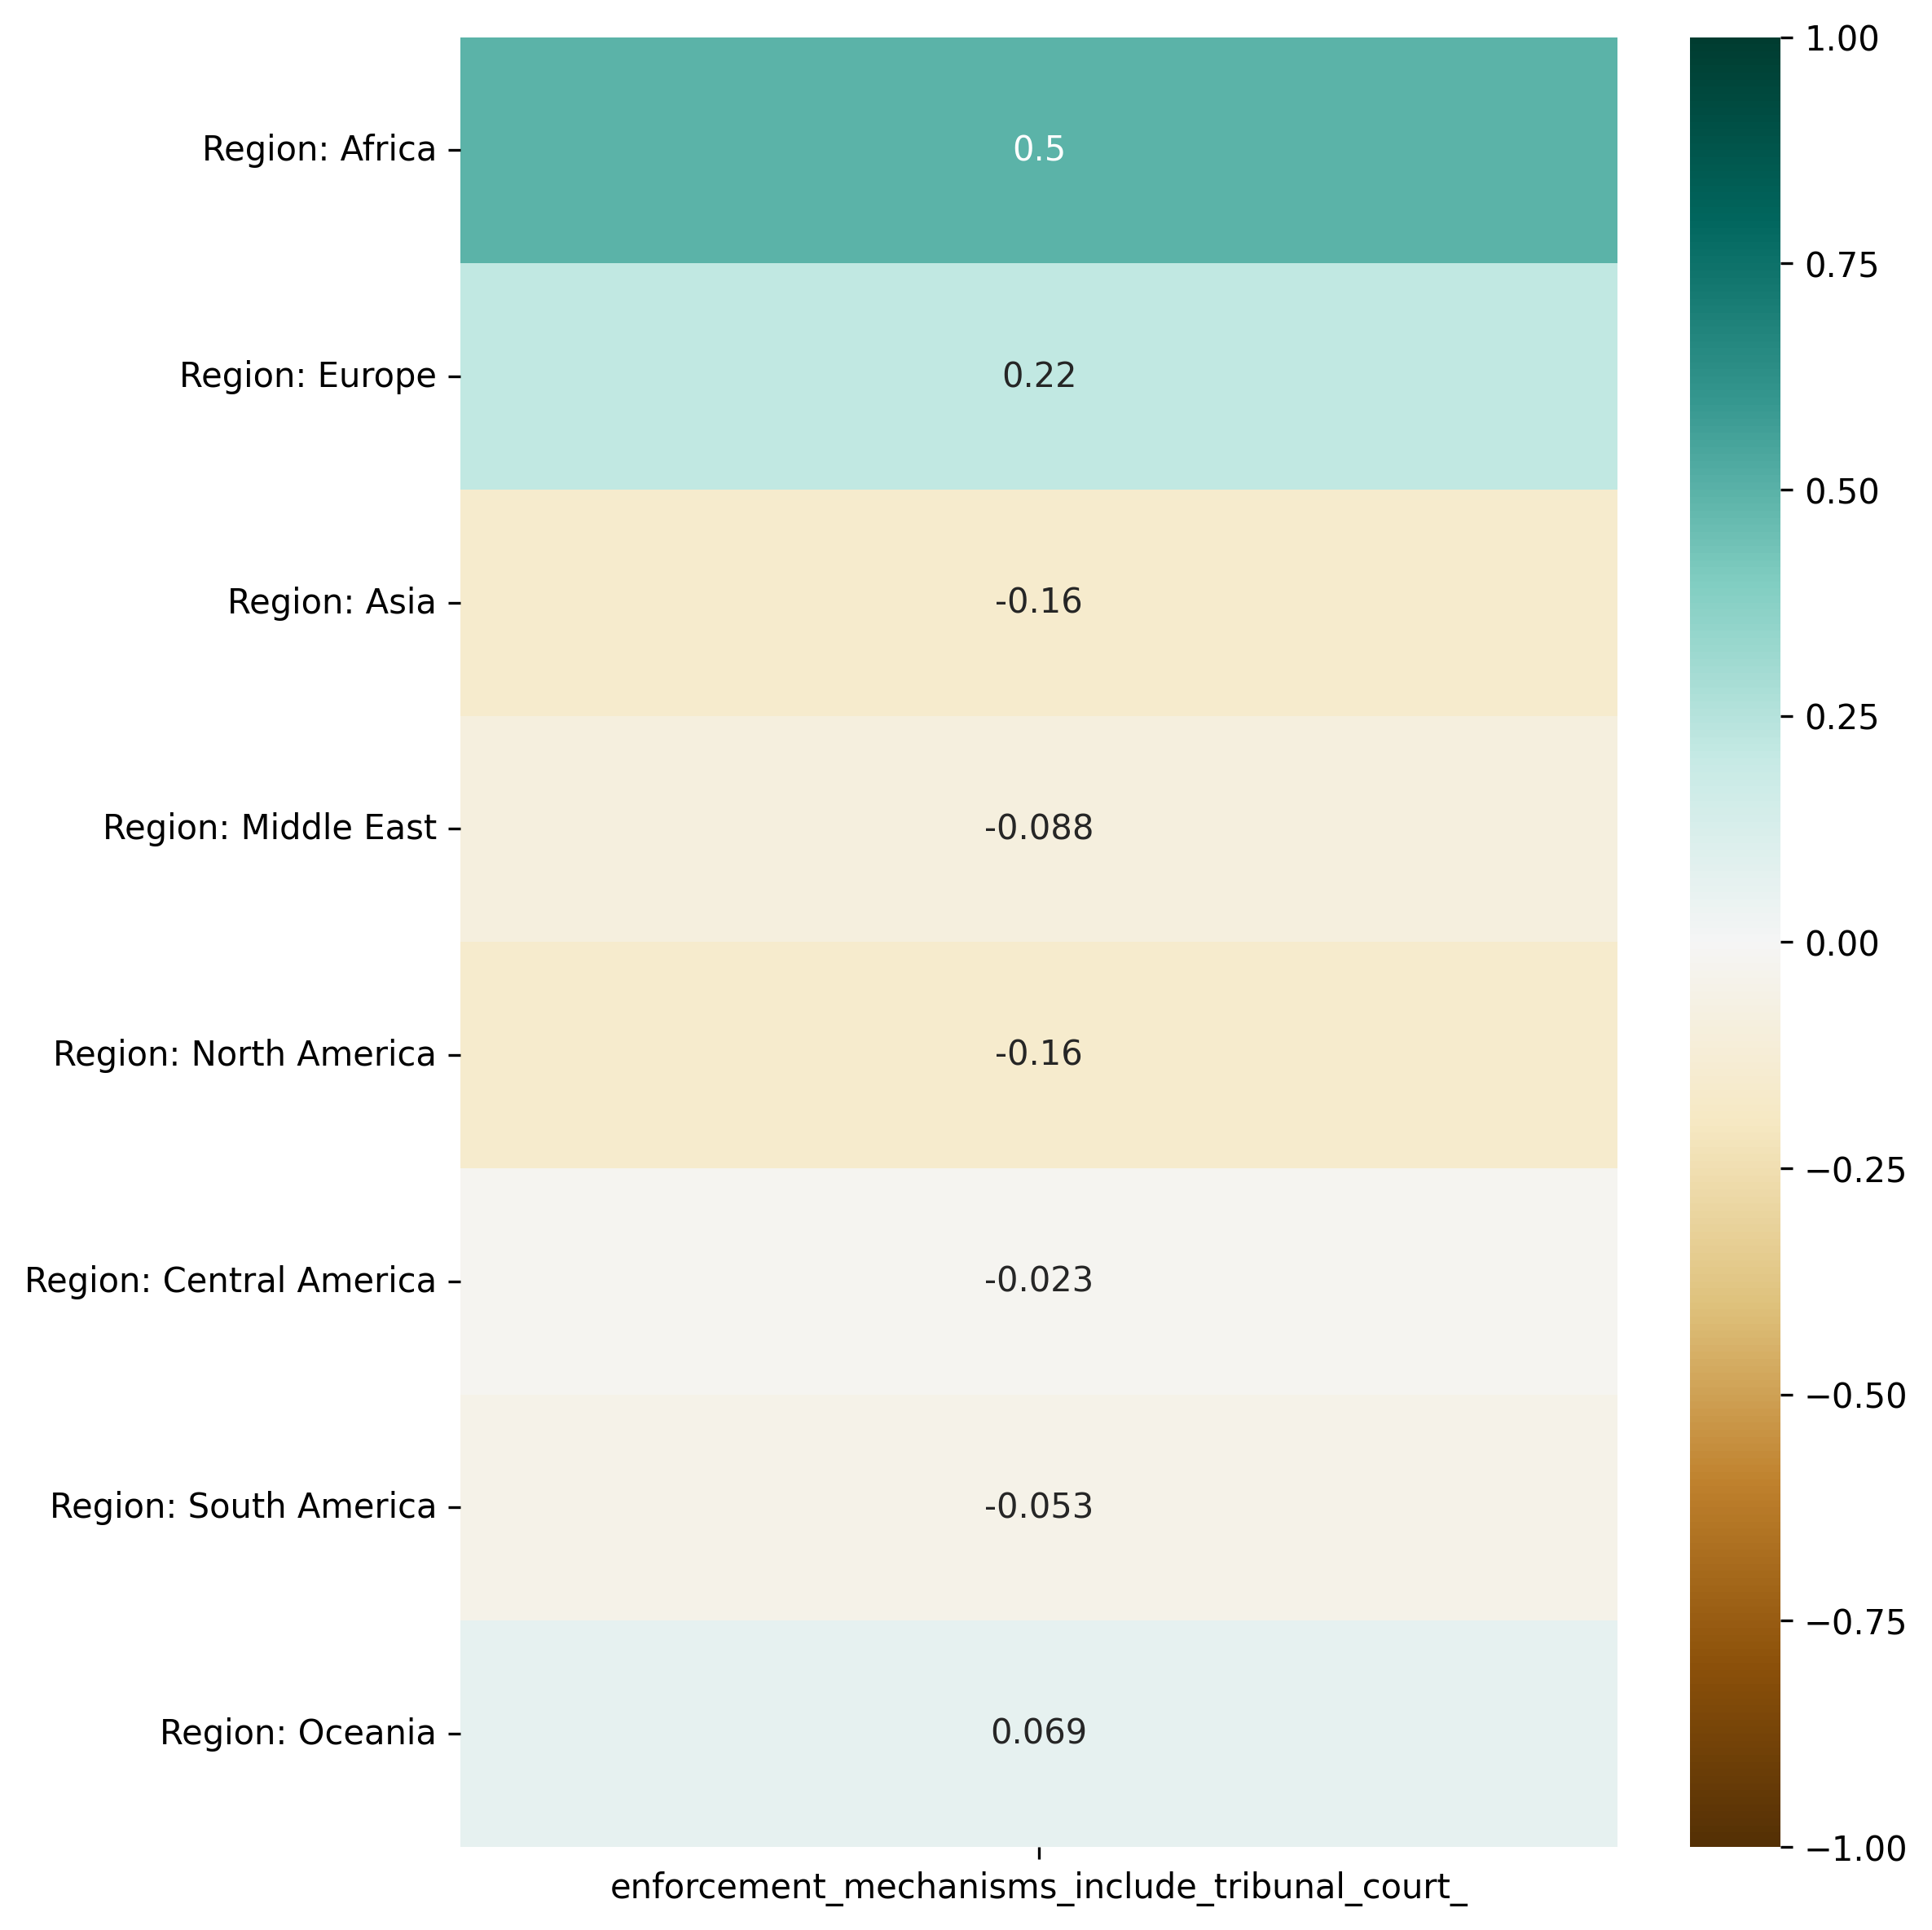

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(
    region_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/courts_region_corr.png')
plt.show()

### Mapping council regions

In [53]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

worldmap.head()

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_47867/1532259957.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [54]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [55]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])
regions_list = list(gov_df['Region'].unique())

In [56]:
region_map['Region'] = regions_list

region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

region_map

Region                                           geometry
0           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...
1           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...
2             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...
3      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...
4  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...

#### All Councils

In [57]:
courts_region_map = region_map

In [58]:
courts_region_counts = courts_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [59]:
courts_region_counts

Region  Count
0           Europe      7
1           Africa      4
2             Asia      2
3          Oceania      1
4      Middle East      1
5  Central America      1

In [60]:
# Custom: Add empty regions
missing_regions_df = pd.DataFrame([['South America', 0],['North America', 0]], columns=['Region', 'Count'])
missing_regions_df

Region  Count
0  South America      0
1  North America      0

In [61]:
# Custom: Add empty regions
courts_region_counts = pd.concat([courts_region_counts, missing_regions_df])
courts_region_counts

Region  Count
0           Europe      7
1           Africa      4
2             Asia      2
3          Oceania      1
4      Middle East      1
5  Central America      1
0    South America      0
1    North America      0

In [62]:
all_merged_regions = pd.merge(courts_region_map, courts_region_counts, on='Region')

In [63]:
all_merged_regions

Region                                           geometry  Count
0           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...      4
1           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...      7
2             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...      2
3      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...      1
4  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...      1
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...      0
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...      0
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...      1

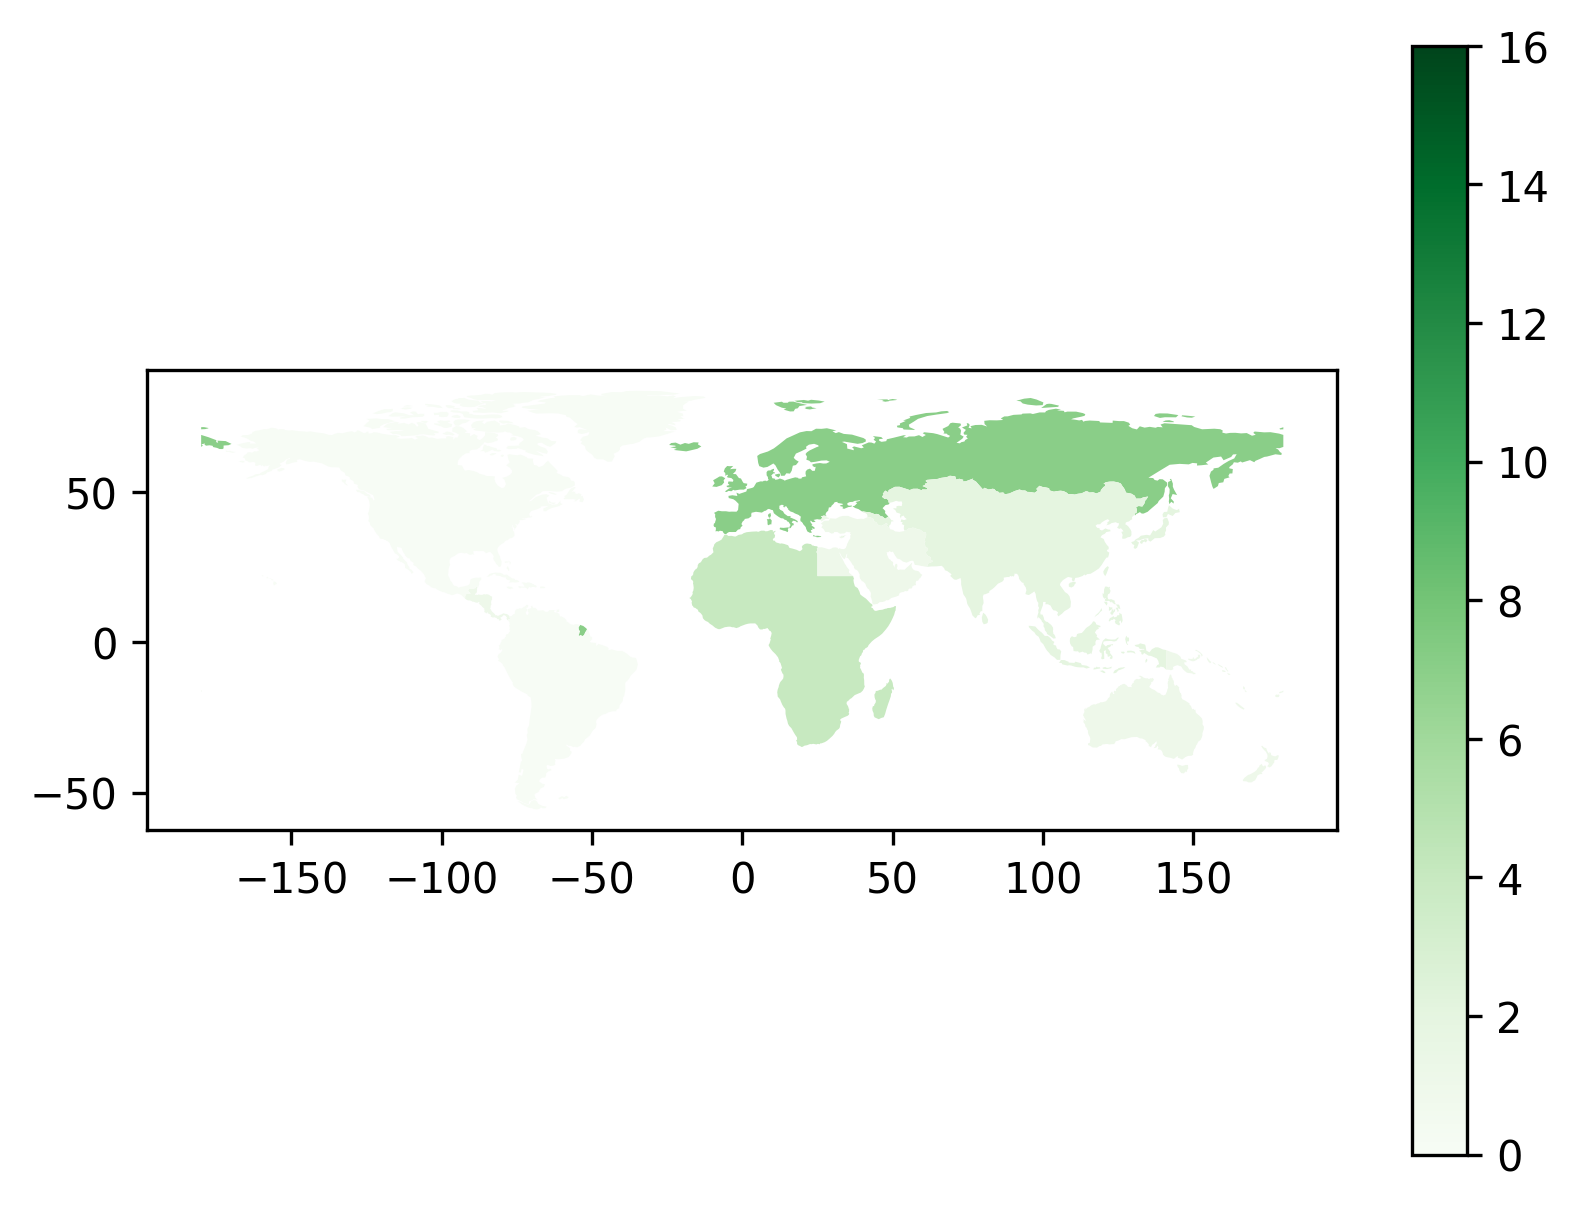

In [65]:
all_merged_regions.plot(
    column='Count', 
    legend=True,
    cmap='Greens',
    vmin=0,
    vmax=16
)

plt.savefig('../v2-fig/fig-courts/map_courts_all.png')
plt.show()

## Courts Analysis: Timeline 

In [66]:
courts_dates_df = courts_df[['Time span: Start', 'Time span: Duration', 'Name'] + court_col]

In [67]:
courts_dates_df

Time span: Start  Time span: Duration                        Name  \
0               1900                  123       !Kung San (Ju/hoansi)   
5              -1920                  120                       Assur   
6               -508                  186   Athens (Classical Period)   
9               -400                  300                    Carthage   
14               900                  300  Communes (Medieval Europe)   
17             -2700                 1700                      Egypt    
18               400                  700       England (Anglo Saxon)   
23              -480                  453           Greek oligarchies   
28               930                  332                    Iceland    
29               900                  660                 Igbo People   
34              1800                  100               Kachin gumlao   
40              1800                  100                 Minangkabau   
57              1800                  100                       Samoa   
59             -1894                  299                      Sippar   
60              1300                  500                 Switzerland   
62              1100                  500                    Tlaxcala   

    enforcement_mechanisms_include_tribunal_court_  
0                                                1  
5                                                1  
6                                                1  
9                                                1  
14                                               1  
17                                               1  
18                                               1  
23                                               1  
28                                               1  
29                                               1  
34                                               1  
40                                               1  
57                                               1  
59                                               1  
60                                               1  
62                                               1

In [68]:
courts_dates_tuples = [tuple(x) for x in courts_dates_df.to_numpy()]
courts_dates_tuples

[(1900, 123, '!Kung San (Ju/hoansi)', 1),
 (-1920, 120, 'Assur', 1),
 (-508, 186, 'Athens (Classical Period)', 1),
 (-400, 300, 'Carthage', 1),
 (900, 300, 'Communes (Medieval Europe)', 1),
 (-2700, 1700, 'Egypt ', 1),
 (400, 700, 'England (Anglo Saxon)', 1),
 (-480, 453, 'Greek oligarchies', 1),
 (930, 332, 'Iceland ', 1),
 (900, 660, 'Igbo People', 1),
 (1800, 100, 'Kachin gumlao', 1),
 (1800, 100, 'Minangkabau', 1),
 (1800, 100, 'Samoa', 1),
 (-1894, 299, 'Sippar', 1),
 (1300, 500, 'Switzerland', 1),
 (1100, 500, 'Tlaxcala', 1)]

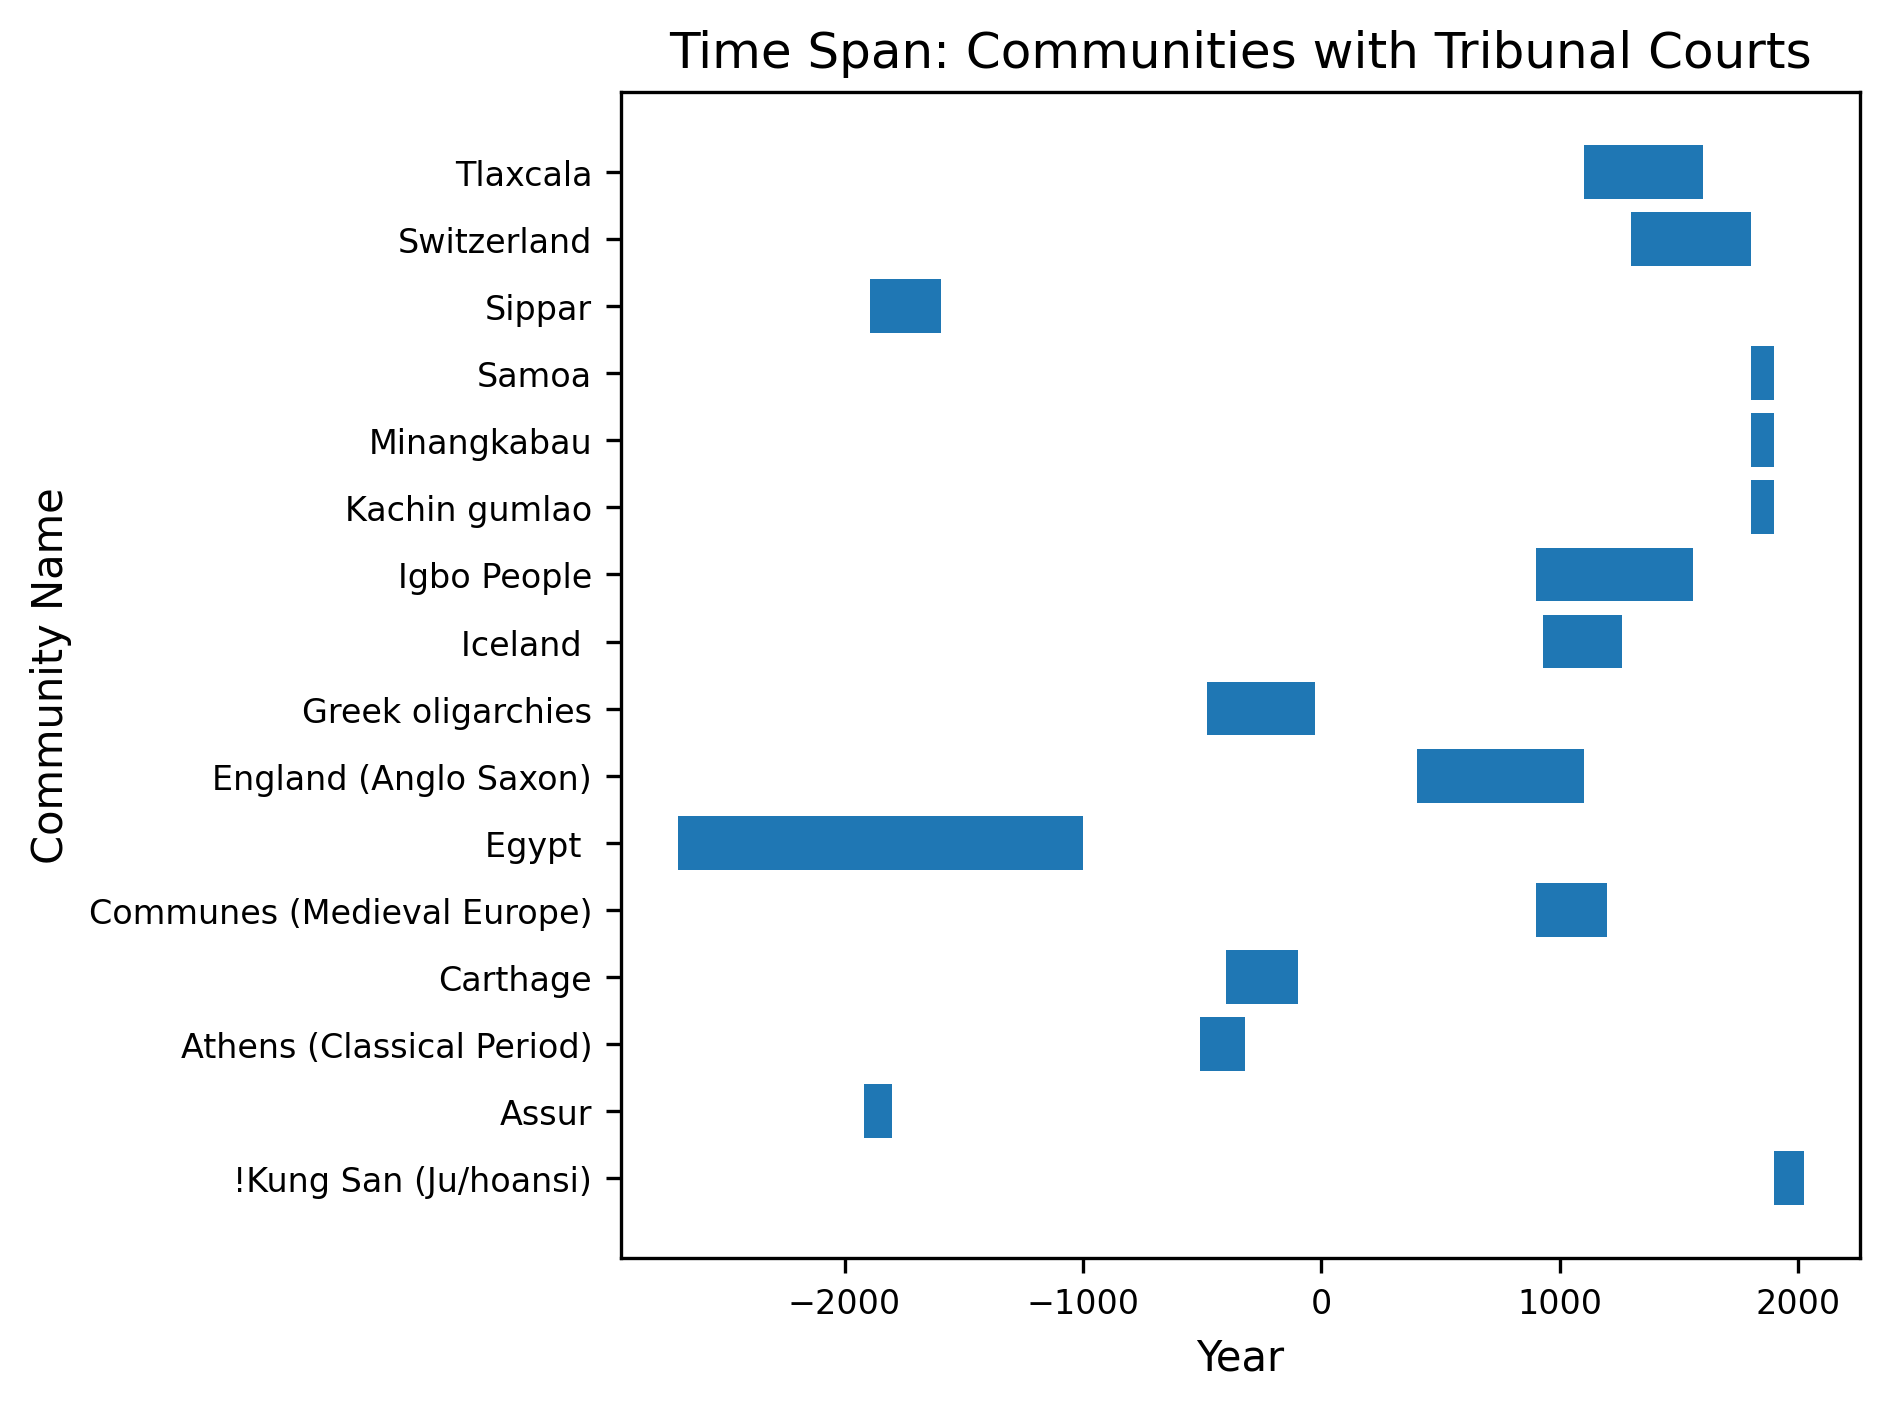

In [70]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (
    start, 
    duration, 
    label, 
    has_courts,
) in enumerate(courts_dates_tuples):
    # bar_color = 'blue'
    
    labels.append(label)
    ax.broken_barh(
        [(start, duration)], 
        (i-0.4,0.8),
        # color=bar_color
    )
    
# set yticks at the middle of the bars
ax.set_yticks(range(len(courts_dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlabel('Year')
ax.set_ylabel('Community Name')

plt.title('Time Span: Communities with Tribunal Courts')
# plt.figure(figsize=(80, 80))

plt.tight_layout()
plt.savefig('../v2-fig/fig-courts/timeline_courts.png')
plt.show()